<h1>Business Case: Delhivery - Feature Engineering</h1>

<img src="https://static.startuptalky.com/2022/05/Delhivery-logo-StartupTalky.jpg" alt="My Image" width="300"/>

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('delhivery_data.csv')

In [6]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


<h2>📃 Features of the dataset:</h2>

| Field                       | Description                                                                                      |
|-----------------------------|--------------------------------------------------------------------------------------------------|
| data                        | Indicates whether the data is testing or training data                                           |
| trip_creation_time          | Timestamp of trip creation                                                                       |
| route_schedule_uuid         | Unique ID for a particular route schedule                                                        |
| route_type                  | Transportation type                                                                              |
| FTL                         | Full Truck Load: FTL shipments reach the destination sooner with no other pickups or drop-offs   |
| Carting                     | Handling system consisting of small vehicles (carts)                                             |
| trip_uuid                   | Unique ID for a particular trip (may include different source and destination centers)           |
| source_center               | Source ID of trip origin                                                                         |
| source_name                 | Source Name of trip origin                                                                       |
| destination_center          | Destination ID                                                                                   |
| destination_name            | Destination Name                                                                                 |
| od_start_time               | Trip start time                                                                                  |
| od_end_time                 | Trip end time                                                                                    |
| start_scan_to_end_scan      | Time taken to deliver from source to destination                                                 |
| is_cutoff                   | Unknown field                                                                                    |
| cutoff_factor               | Unknown field                                                                                    |
| cutoff_timestamp            | Unknown field                                                                                    |
| actual_distance_to_destination | Distance in Kms between source and destination warehouse                                      |
| actual_time                 | Actual time taken to complete the delivery (Cumulative)                                          |
| osrm_time                   | Open-source routing engine time calculator (Cumulative)                                          |
| osrm_distance               | Open-source routing engine computed distance (Cumulative)                                        |
| factor                      | Unknown field                                                                                    |
| segment_actual_time         | Segment time. Time taken by the subset of the package delivery                                   |
| segment_osrm_time           | OSRM segment time. Time taken by the subset of the package delivery                              |
| segment_osrm_distance       | OSRM distance. Distance covered by the subset of the package delivery                            |
| segment_factor              | Unknown field                                                                                    |

## Key Concepts

1. **Feature Creation**
   - Definition: The process of creating new features from existing data to improve model performance.
   - Importance: Helps in enhancing the predictive power of the model by providing more relevant information.

2. **Relationship between Features**
   - Definition: Understanding how features interact and influence each other.
   - Importance: Can help in feature selection and engineering to improve model accuracy.

3. **Column Normalization / Column Standardization**
   - Definition: Techniques used to scale features to a similar range.
   - Importance: Essential for algorithms that rely on the distance between data points, like KNN.

4. **Handling Categorical Values**
   - Definition: Methods to convert categorical data into a numerical format.
   - Importance: Necessary for machine learning algorithms that require numerical input.

5. **Missing Values and Outlier Treatment**
   - Definition: Strategies to handle missing data and identify outliers.
   - Types of Outliers:
     - **Univariate Outliers**: Extreme values in a single feature.
     - **Multivariate Outliers**: Unusual combinations of values across multiple features.
   - Importance: Ensures data quality and improves model robustness.

## Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [9]:
data.shape

(144867, 24)

In [10]:
print(f"TOTAL ROWS : {data.shape[0]}")
print(f"TOTAL COLUMNS : {data.shape[1]}")

TOTAL ROWS : 144867
TOTAL COLUMNS : 24


In [11]:
print(f"SIZE OF DataFrame : {data.size}")

SIZE OF DataFrame : 3476808


In [12]:
print(f"Index of the DataFrame : {data.index}")

Index of the DataFrame : RangeIndex(start=0, stop=144867, step=1)


In [14]:
print(f"Coulumns : {data.columns}")

Coulumns : Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')


In [15]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [17]:
data.isnull()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144863,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144864,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144865,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [21]:
# Note: There are somedata.duplicated()

In [22]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
144862    False
144863    False
144864    False
144865    False
144866    False
Length: 144867, dtype: bool

In [23]:
data.duplicated().sum()

0

In [24]:
# Note: There are zero duplicate values in the dataset

In [26]:
#Taking a copy of data into data_copy
data_copy = data.copy()

In [27]:
data.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [28]:
from scipy import stats
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [29]:
#Dropping unknown fields
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
data = data.drop(columns = unknown_fields)

In [31]:
#How many unique entries present in each column ?
for i in data.columns:
    print(f"Unique entries for column {i:<30} = {data[i].nunique()}")

Unique entries for column data                           = 2
Unique entries for column trip_creation_time             = 14817
Unique entries for column route_schedule_uuid            = 1504
Unique entries for column route_type                     = 2
Unique entries for column trip_uuid                      = 14817
Unique entries for column source_center                  = 1508
Unique entries for column source_name                    = 1498
Unique entries for column destination_center             = 1481
Unique entries for column destination_name               = 1468
Unique entries for column od_start_time                  = 26369
Unique entries for column od_end_time                    = 26369
Unique entries for column start_scan_to_end_scan         = 1915
Unique entries for column actual_distance_to_destination = 144515
Unique entries for column actual_time                    = 3182
Unique entries for column osrm_time                      = 1531
Unique entries for column osrm_distance 

In [33]:
#For all those columns where number of unique entries is 2, converting the datatype of columns to category
data['data'] = data['data'].astype('category')
data['route_type'] = data['route_type'].astype('category')

In [34]:
floating_columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 
                    'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
for i in floating_columns:
    print(i, data[i].max())

actual_distance_to_destination 1927.4477046975032
actual_time 4532.0
osrm_time 1686.0
osrm_distance 2326.1991000000003
segment_actual_time 3051.0
segment_osrm_time 1611.0
segment_osrm_distance 2191.4037000000003


In [35]:
#We can update the datatype to float32 since the maximum value entry is small
for i in floating_columns:
    data[i] = data[i].astype('float32')

In [36]:
#Updating the datatype of the datetime columns
datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_columns:
    data[i] = pd.to_datetime(data[i])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [39]:
#memory usage reduced from 25.6+ MB to 15.2+ MB

In [40]:
#What is the time period for which the data is given ?
data['trip_creation_time'].min(), data['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

In [41]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [42]:
missing_source_name = data.loc[data['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [43]:
for i in missing_source_name:
    unique_source_name = data.loc[data['source_center'] == i, 'source_name'].unique()
    if pd.isna(unique_source_name):
        print("Source Center :", i, "-" * 10, "Source Name :", 'Not Found')
    else : 
        print("Source Center :", i, "-" * 10, "Source Name :", unique_source_name)

Source Center : IND342902A1B ---------- Source Name : Not Found
Source Center : IND577116AAA ---------- Source Name : Not Found
Source Center : IND282002AAD ---------- Source Name : Not Found
Source Center : IND465333A1B ---------- Source Name : Not Found
Source Center : IND841301AAC ---------- Source Name : Not Found
Source Center : IND509103AAC ---------- Source Name : Not Found
Source Center : IND126116AAA ---------- Source Name : Not Found
Source Center : IND331022A1B ---------- Source Name : Not Found
Source Center : IND505326AAB ---------- Source Name : Not Found
Source Center : IND852118A1B ---------- Source Name : Not Found


In [45]:
for i in missing_source_name:
    unique_destination_name = data.loc[data['destination_center'] == i, 'destination_name'].unique()
    if (pd.isna(unique_source_name)) or (unique_source_name.size == 0):
        print("Destination Center :", i, "-" * 10, "Destination Name :", 'Not Found')
    else : 
        print("Destination Center :", i, "-" * 10, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ---------- Destination Name : Not Found
Destination Center : IND577116AAA ---------- Destination Name : Not Found
Destination Center : IND282002AAD ---------- Destination Name : Not Found
Destination Center : IND465333A1B ---------- Destination Name : Not Found
Destination Center : IND841301AAC ---------- Destination Name : Not Found
Destination Center : IND509103AAC ---------- Destination Name : Not Found
Destination Center : IND126116AAA ---------- Destination Name : Not Found
Destination Center : IND331022A1B ---------- Destination Name : Not Found
Destination Center : IND505326AAB ---------- Destination Name : Not Found
Destination Center : IND852118A1B ---------- Destination Name : Not Found


In [47]:
missing_destination_name = data.loc[data['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [48]:
#The IDs for which the source name is missing, are all those IDs for destination also missing ?
np.all(data.loc[data['source_name'].isnull(), 'source_center'].isin(missing_destination_name))

False

In [50]:
#Treating missing destination names and source names
count = 1
for i in missing_destination_name:
    data.loc[data['destination_center'] == i, 'destination_name'] = data.loc[data['destination_center'] == i, 'destination_name'].replace(np.nan, f'location_{count}')
    count += 1

In [51]:
d = {}
for i in missing_source_name:
    d[i] = data.loc[data['destination_center'] == i, 'destination_name'].unique()
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1
d2 = {}
for idx, val in d.items():
    d2[idx] = val[0]
for i, v in d2.items():
    print(i, v)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [52]:
for i in missing_source_name:
    data.loc[data['source_center'] == i, 'source_name'] = data.loc[data['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [54]:
data.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [55]:
data.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809
std,NaN,NaN,NaN,1037.012769,344.990021,598.103638,308.011078,421.119293,53.571156,14.775960,17.860661


In [56]:
data.describe(include = 'object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1508,1481,1481
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


# Merging of rows and aggregation of fields

How to begin"

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows.

In [58]:
grouping_1 = ['trip_uuid', 'source_center', 'destination_center']
data_1 = data.groupby(by = grouping_1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
data_1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,49.0,42.0,42.143101
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,89.0,77.0,78.586899
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,29.0,14.0,16.018400
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,233.0,42.0,52.530300


In [60]:
#Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
data_1['od_total_time'] = data_1['od_end_time'] - data_1['od_start_time']
data_1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
data_1['od_total_time'] = data_1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
data_1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [61]:
data_2 = data_1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
data_2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394


# Build some features to prepare the data for actual analysis. Extract features from the below fields

In [62]:
#Source Name: Split and extract features out of destination. City-place-code (State)
def location_name_to_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")

In [63]:
def location_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [64]:
def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [65]:
data_2['source_state'] = data_2['source_name'].apply(location_name_to_state)
data_2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [66]:
data_2['source_city'] = data_2['source_name'].apply(location_name_to_city)
print('No of source cities :', data_2['source_city'].nunique())
data_2['source_city'].unique()[:100]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [67]:
data_2['source_place'] = data_2['source_name'].apply(location_name_to_place)
data_2['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

In [68]:
#Destination Name: Split and extract features out of destination. City-place-code (State)
data_2['destination_state'] = data_2['destination_name'].apply(location_name_to_state)
data_2['destination_state'].head(10)

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
5       Tamil Nadu
6       Tamil Nadu
7        Karnataka
8          Gujarat
9            Delhi
Name: destination_state, dtype: object

In [69]:
data_2['destination_city'] = data_2['destination_name'].apply(location_name_to_city)
data_2['destination_city'].head()

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
Name: destination_city, dtype: object

In [70]:
data_2['destination_place'] = data_2['destination_name'].apply(location_name_to_place)
data_2['destination_place'].head()

0    Central_H_6
1     ChikaDPP_D
2    Bilaspur_HB
3      MiraRd_IP
4     WrdN1DPP_D
Name: destination_place, dtype: object

In [71]:
#Trip_creation_time: Extract features like month, year and day etc
data_2['trip_creation_date'] = pd.to_datetime(data_2['trip_creation_time'].dt.date)
data_2['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [72]:
data_2['trip_creation_day'] = data_2['trip_creation_time'].dt.day
data_2['trip_creation_day'] = data_2['trip_creation_day'].astype('int8')
data_2['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [73]:
data_2['trip_creation_month'] = data_2['trip_creation_time'].dt.month
data_2['trip_creation_month'] = data_2['trip_creation_month'].astype('int8')
data_2['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

In [74]:
data_2['trip_creation_year'] = data_2['trip_creation_time'].dt.year
data_2['trip_creation_year'] = data_2['trip_creation_year'].astype('int16')
data_2['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

In [75]:
data_2['trip_creation_week'] = data_2['trip_creation_time'].dt.isocalendar().week
data_2['trip_creation_week'] = data_2['trip_creation_week'].astype('int8')
data_2['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

In [76]:
data_2['trip_creation_hour'] = data_2['trip_creation_time'].dt.hour
data_2['trip_creation_hour'] = data_2['trip_creation_hour'].astype('int8')
data_2['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

In [78]:
#Finding the structure of data after data cleaning
data_2.shape

(14817, 29)

In [80]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float32       
 11  ac

In [81]:
data_2.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14817,2018-09-22 12:44:19.555167744,2018-09-12 00:00:16.535741,2018-09-17 02:51:25.129125888,2018-09-22 04:02:35.066945024,2018-09-27 19:37:41.898427904,2018-10-03 23:59:42.701692,NaN
od_total_time,14817.0,531.69763,23.46,149.93,280.77,638.2,7898.55,658.868223
start_scan_to_end_scan,14817.0,530.810016,23.0,149.0,280.0,637.0,7898.0,658.705957
actual_distance_to_destination,14817.0,164.477829,9.002461,22.837238,48.474072,164.583206,2186.531738,305.388153
actual_time,14817.0,357.143768,9.0,67.0,149.0,370.0,6265.0,561.396118
osrm_time,14817.0,161.384018,6.0,29.0,60.0,168.0,2032.0,271.360992
osrm_distance,14817.0,204.344711,9.0729,30.819201,65.618805,208.475006,2840.081055,370.395569
segment_actual_time,14817.0,353.892273,9.0,66.0,147.0,367.0,6230.0,556.247925
segment_osrm_time,14817.0,180.949783,6.0,31.0,65.0,185.0,2564.0,314.542053
segment_osrm_distance,14817.0,223.201157,9.0729,32.654499,70.154404,218.802399,3523.632324,416.628387


In [82]:
data_2.describe(include = object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14817,938,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1042,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14817,34,Maharashtra,2714
source_city,14817,690,Mumbai,1442
source_place,14817,761,Bilaspur_HB,1063
destination_state,14817,39,Maharashtra,2561
destination_city,14817,806,Mumbai,1548


In [83]:
#I am intrested to know how many trips are created on the hourly basis
data_2['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [84]:
df_hour = data_2.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour.head()

,trip_creation_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636


[]

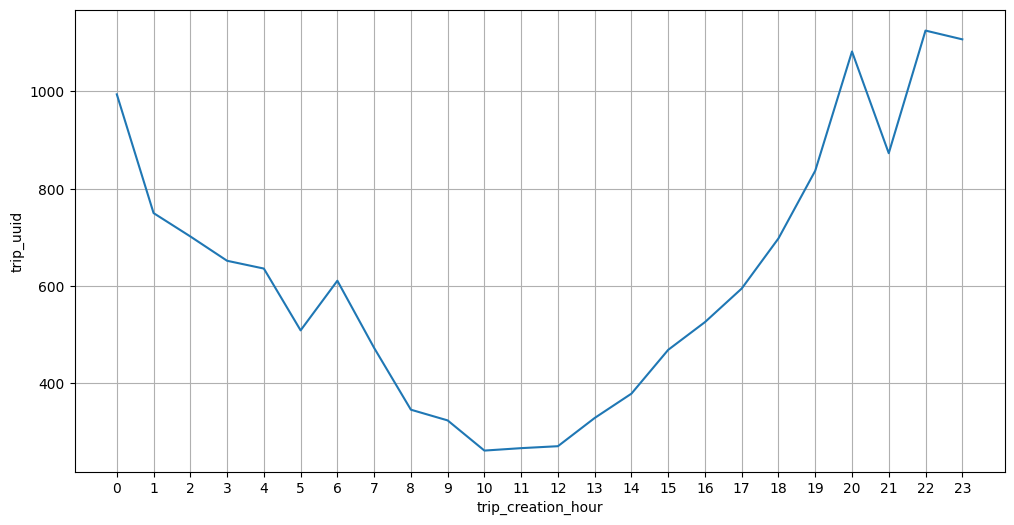

In [85]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_hour, 
             x = df_hour['trip_creation_hour'], 
             y = df_hour['trip_uuid'], 
             markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

In [86]:
#It can be inferred from the above plot that the number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

In [87]:
#I am intrested to know how many trips are created for different days of the month
data_2['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int8)

In [88]:
df_day = data_2.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_day.head()

,trip_creation_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750


[]

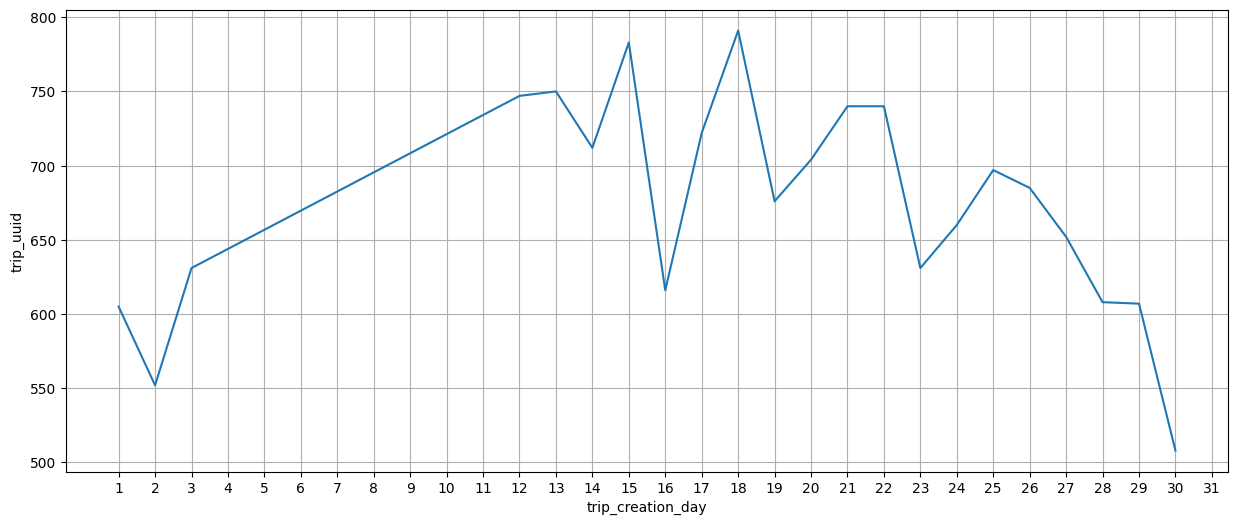

In [89]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = df_day, 
             x = df_day['trip_creation_day'], 
             y = df_day['trip_uuid'], 
             markers = 'o')
plt.xticks(np.arange(1, 32))
plt.grid('both')
plt.plot()

In [90]:
#It can be inferred from the above plot that most of the trips are created in the mid of the month.
#That means customers usually make more orders in the mid of the month.

In [91]:
#I am intrested to know how many trips are created for different weeks
data_2['trip_creation_week'].unique()

array([37, 38, 39, 40], dtype=int8)

In [93]:
df_week = data_2.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()
df_week.head()

,trip_creation_week,trip_uuid
0,37,3608
1,38,5004
2,39,4417
3,40,1788


[]

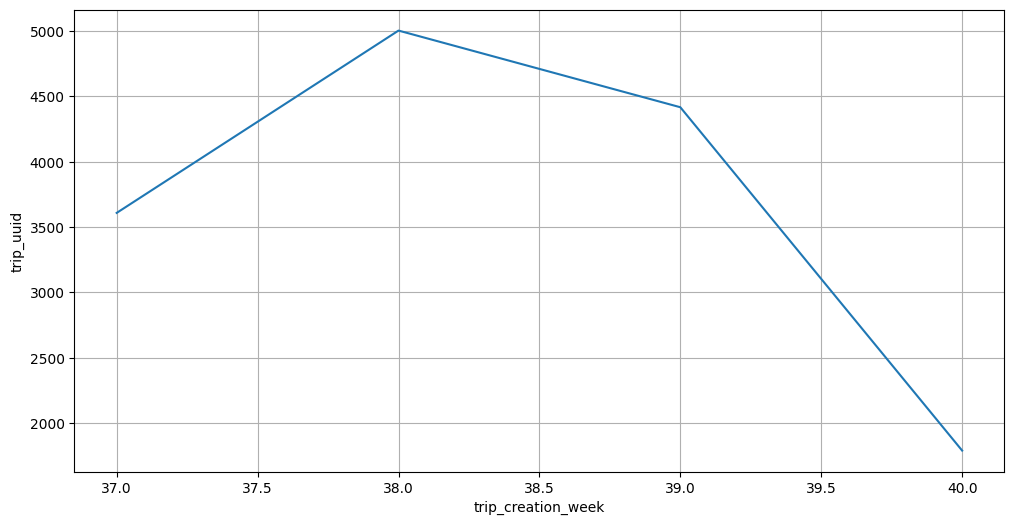

In [94]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_week, 
             x = df_week['trip_creation_week'], 
             y = df_week['trip_uuid'], 
             markers = 'o')
plt.grid('both')
plt.plot()

In [95]:
#It can be inferred from the above plot that most of the trips are created in the 38th week.

In [96]:
#I am intrested to know how many trips are created in the given two months
df_month = data_2.groupby(by = 'trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
df_month['perc'] = np.round(df_month['trip_uuid'] * 100/ df_month['trip_uuid'].sum(), 2)
df_month.head()

,trip_creation_month,trip_uuid,perc
0,9,13029,87.93
1,10,1788,12.07


[]

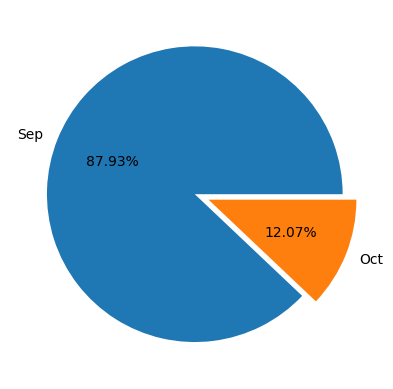

In [97]:
plt.pie(x = df_month['trip_uuid'], 
        labels = ['Sep', 'Oct'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.plot()

In [98]:
#I am interested to know the distribution of trip data for the orders
df_data = data_2.groupby(by = 'data')['trip_uuid'].count().to_frame().reset_index()
df_data['perc'] = np.round(df_data['trip_uuid'] * 100/ df_data['trip_uuid'].sum(), 2)
df_data.head()

,data,trip_uuid,perc
0,test,4163,28.1
1,training,10654,71.9


[]

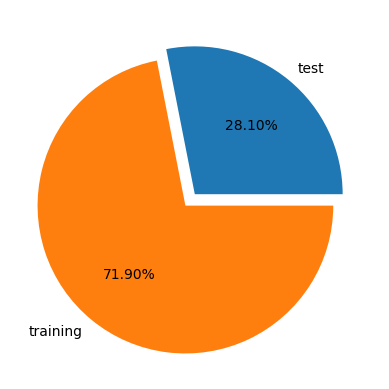

In [99]:
plt.pie(x = df_data['trip_uuid'], 
        labels = df_data['data'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

In [100]:
#I am interested to know the distribution of route types for the orders
df_route = data_2.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

,route_type,trip_uuid,perc
0,Carting,8908,60.12
1,FTL,5909,39.88


[]

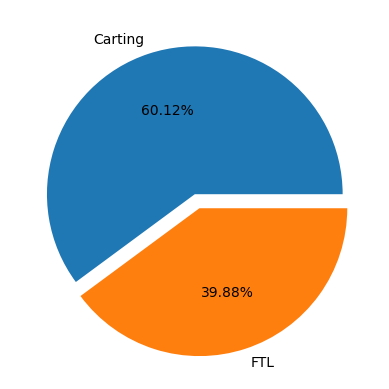

In [101]:
plt.pie(x = df_route['trip_uuid'], 
        labels = ['Carting', 'FTL'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

In [102]:
#I am interested to know what is the distribution of number of trips created from different states
df_source_state = data_2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,2714,18.32
14,Karnataka,2143,14.46
10,Haryana,1838,12.40
24,Tamil Nadu,1039,7.01
25,Telangana,781,5.27


[]

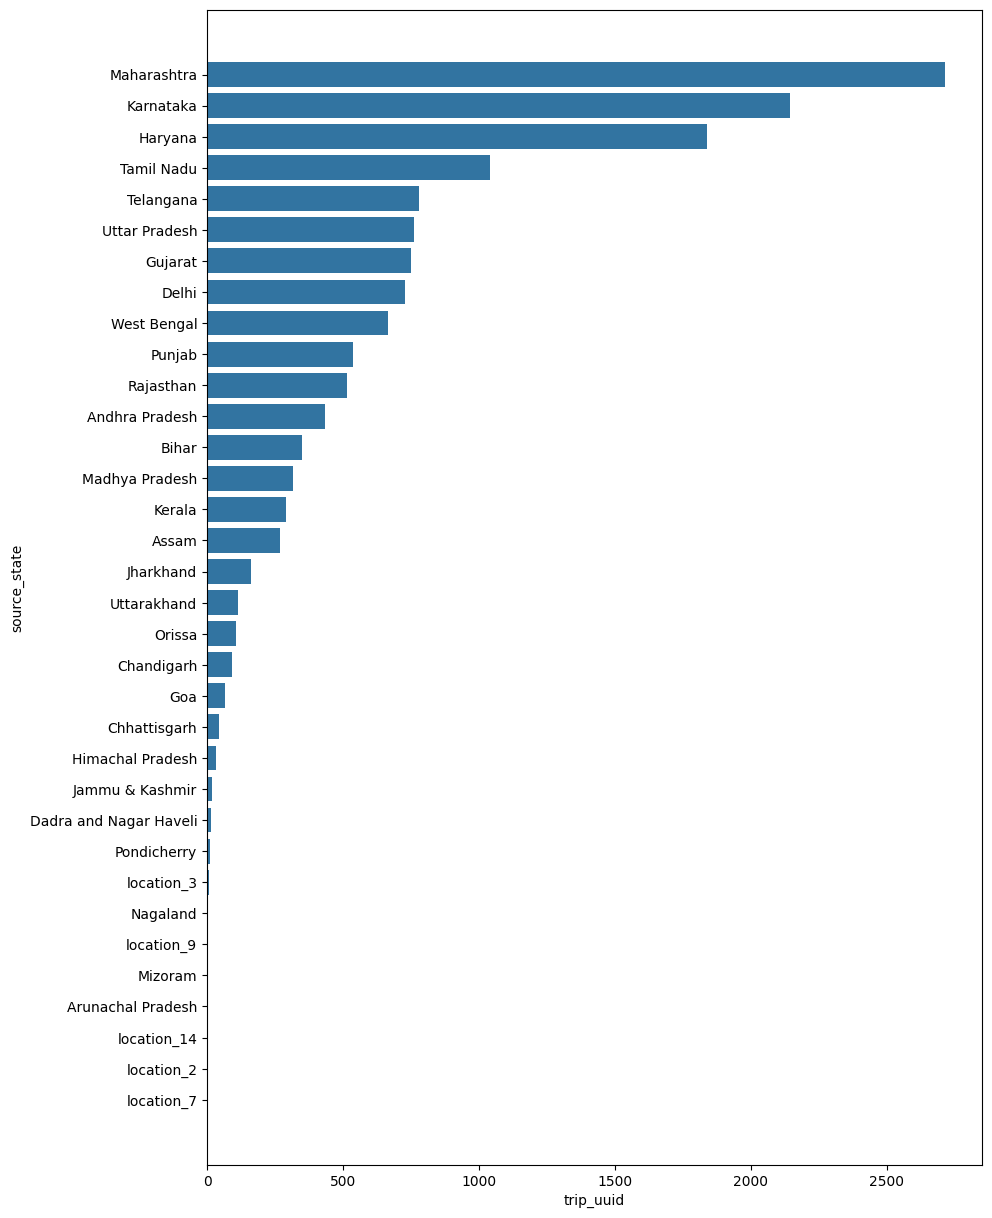

In [103]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state, 
            x = df_source_state['trip_uuid'], 
            y = df_source_state['source_state'])
plt.plot()

In [105]:
#It can be seen in the above plot that maximum trips originated from Maharashtra state followed by Karnataka and Haryana. 
#That means that the seller base is strong in these states

In [106]:
#I am interested to know top 30 cities based on the number of trips created from different cities
df_source_city = data_2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city

,source_city,trip_uuid,perc
439,Mumbai,1442,9.73
237,Gurgaon,1165,7.86
169,Delhi,883,5.96
79,Bengaluru,726,4.90
100,Bhiwandi,697,4.70
58,Bangalore,648,4.37
136,Chennai,568,3.83
264,Hyderabad,524,3.54
516,Pune,480,3.24
357,Kolkata,356,2.40


[]

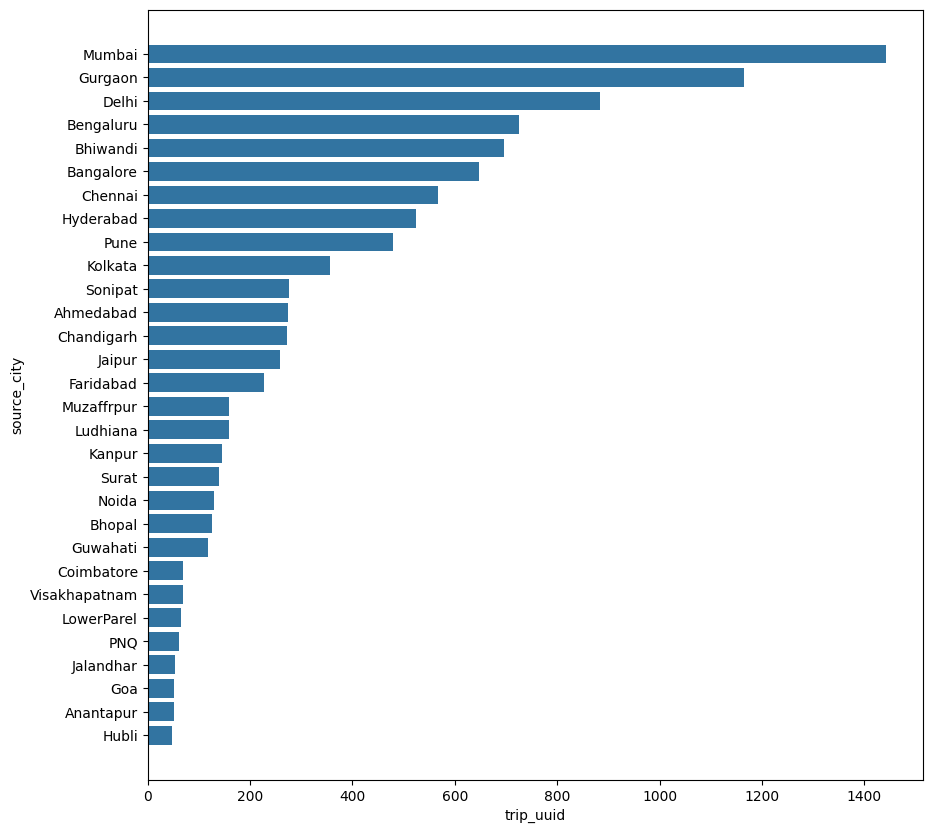

In [107]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city, 
            x = df_source_city['trip_uuid'], 
            y = df_source_city['source_city'])
plt.plot()

In [109]:
#It can be seen in the above plot that maximum trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi.
#That means that the seller base is strong in these cities.

In [110]:
df_destination_state = data_2.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)
df_destination_state.head()

,destination_state,trip_uuid,perc
18,Maharashtra,2561,17.28
15,Karnataka,2294,15.48
11,Haryana,1643,11.09
25,Tamil Nadu,1084,7.32
28,Uttar Pradesh,811,5.47


[]

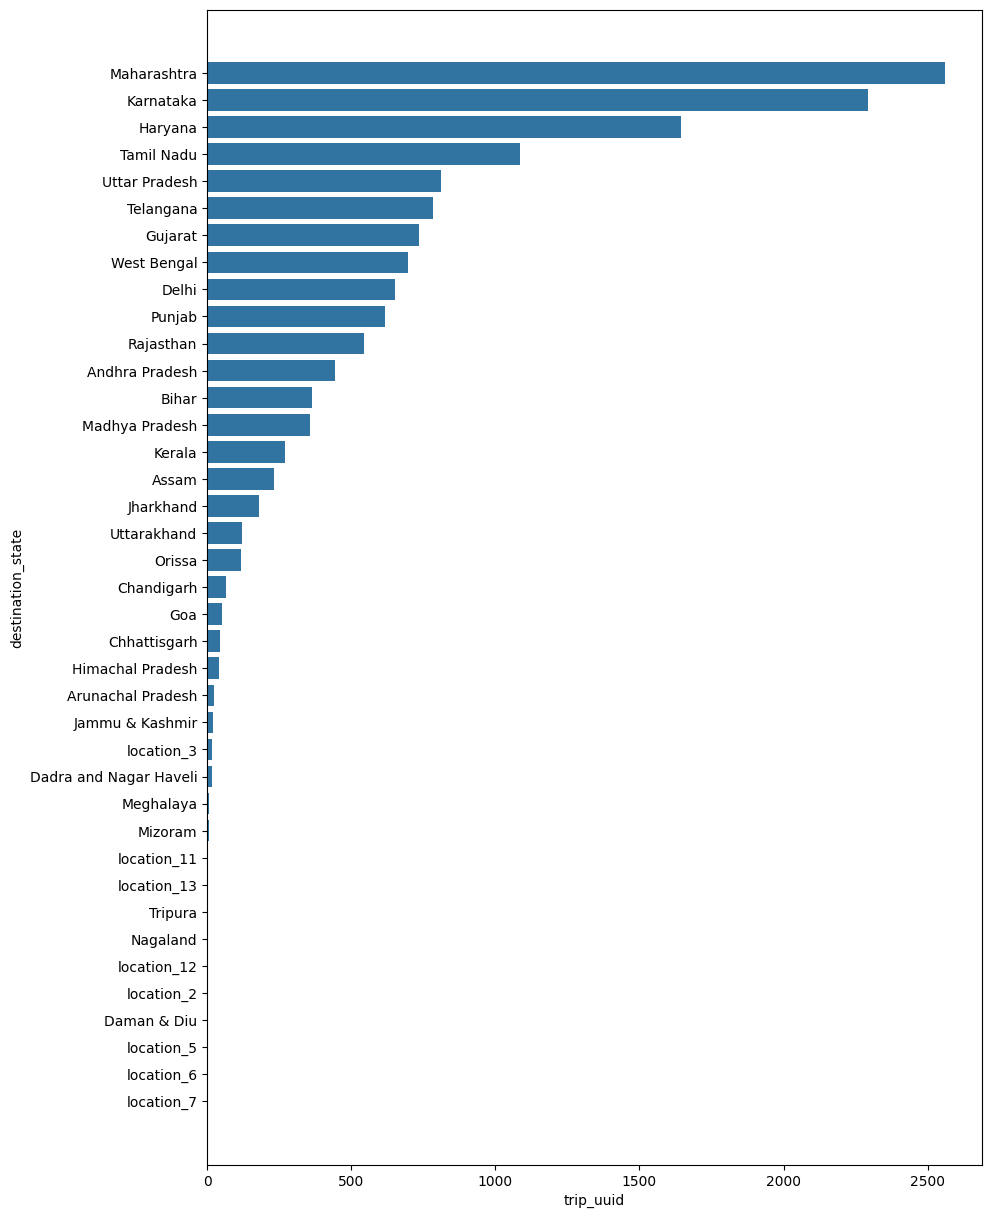

In [111]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_destination_state, 
            x = df_destination_state['trip_uuid'], 
            y = df_destination_state['destination_state'])
plt.plot()

In [112]:
#It can be seen in the above plot that maximum trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh.
#That means that the number of orders placed in these states is significantly high in these states.

In [114]:
#I am interested to know top 30 cities based on the number of trips ended in different cities
df_destination_city = data_2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_destination_city

,destination_city,trip_uuid,perc
515,Mumbai,1548,10.45
96,Bengaluru,975,6.58
282,Gurgaon,936,6.32
200,Delhi,778,5.25
163,Chennai,595,4.02
72,Bangalore,551,3.72
308,Hyderabad,503,3.39
115,Bhiwandi,434,2.93
418,Kolkata,384,2.59
158,Chandigarh,339,2.29


[]

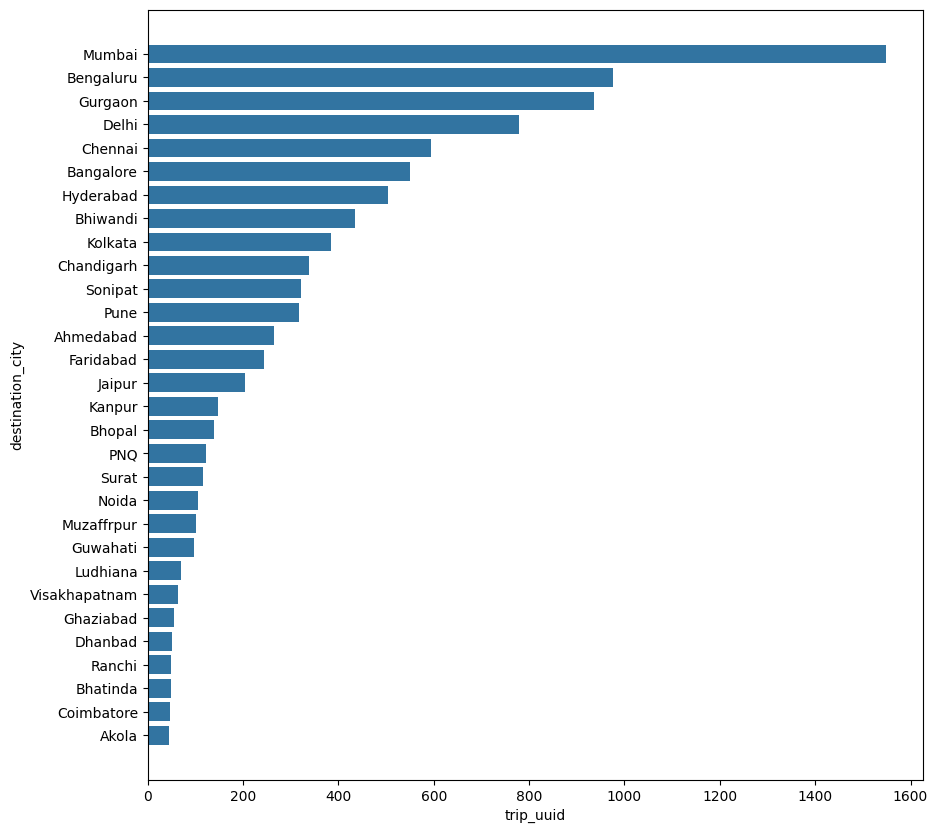

In [115]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city, 
            x = df_destination_city['trip_uuid'], 
            y = df_destination_city['destination_city'])
plt.plot()

In [116]:
#It can be seen in the above plot that maximum trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai.
#That means that the number of orders placed in these cities is significantly high.

[]

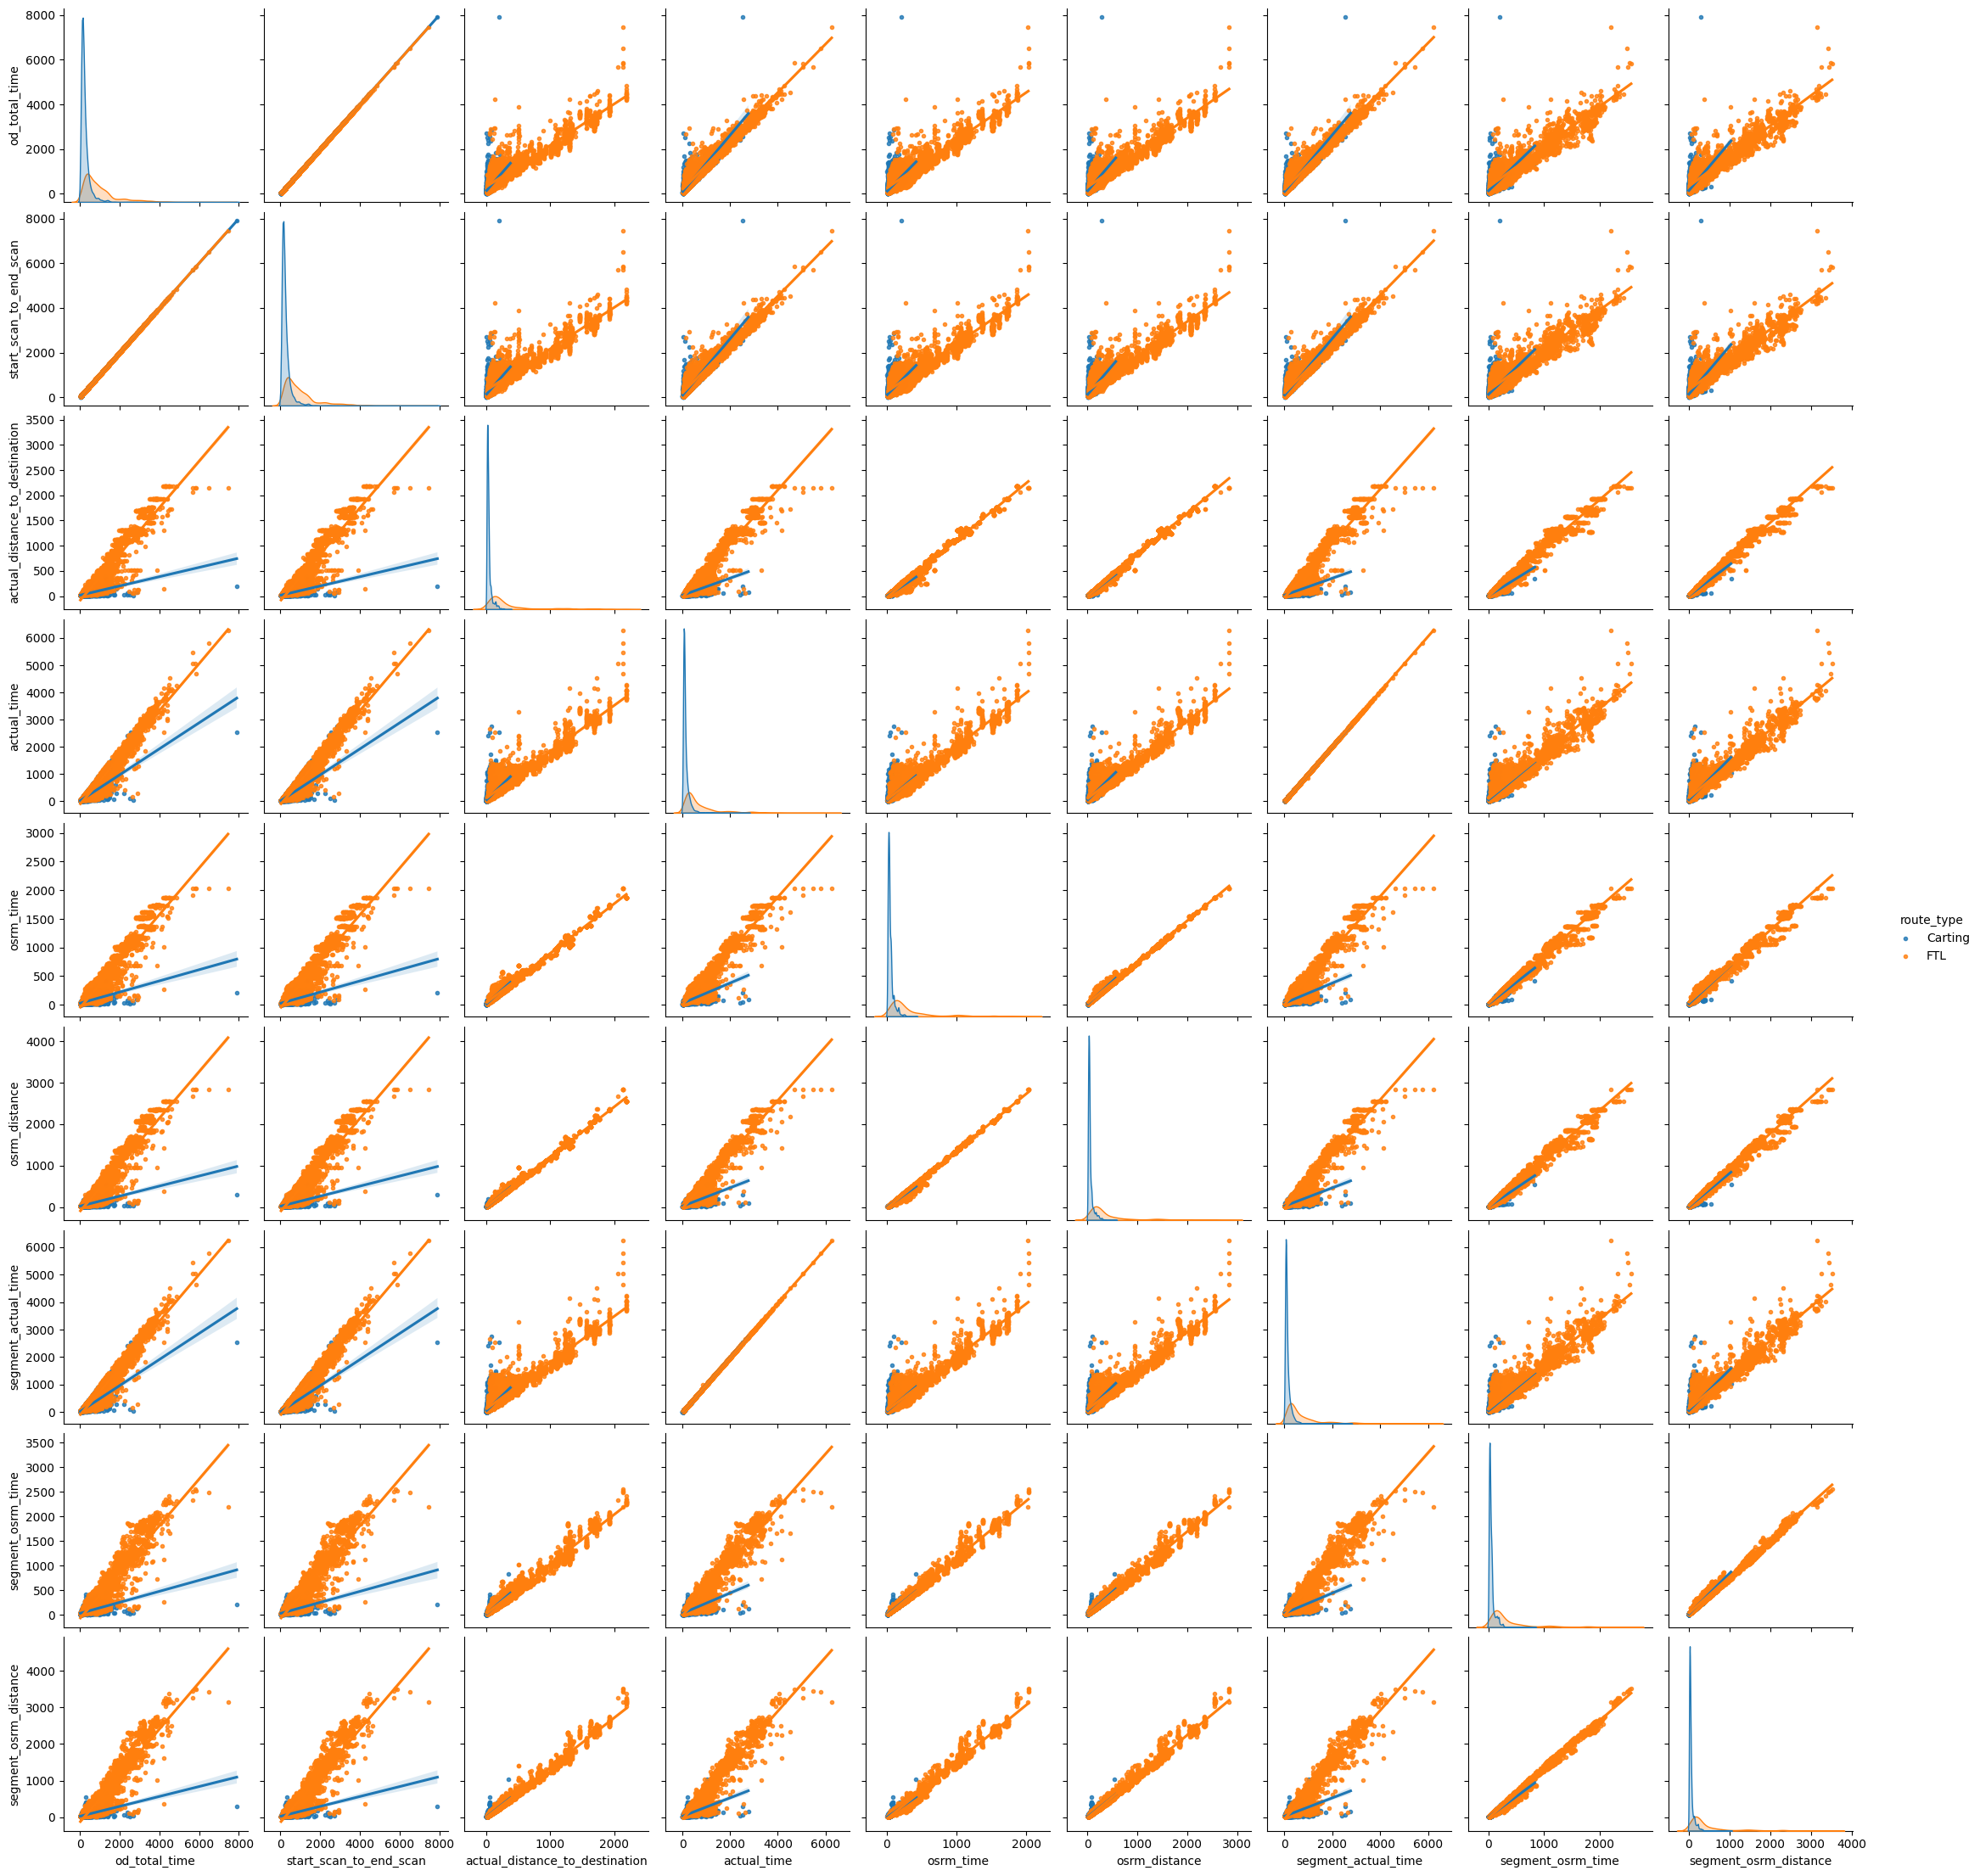

In [118]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data = data_2,
             vars = numerical_columns,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.plot()

In [119]:
df_corr = data_2[numerical_columns].corr()
df_corr

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,0.999999,0.918222,0.961094,0.926516,0.924219,0.961119,0.918490,0.919199
start_scan_to_end_scan,0.999999,1.000000,0.918308,0.961147,0.926571,0.924299,0.961171,0.918561,0.919291
actual_distance_to_destination,0.918222,0.918308,1.000000,0.953757,0.993561,0.997264,0.952821,0.987538,0.993061
actual_time,0.961094,0.961147,0.953757,1.000000,0.958593,0.959214,0.999989,0.953872,0.956967
osrm_time,0.926516,0.926571,0.993561,0.958593,1.000000,0.997580,0.957765,0.993259,0.991608
osrm_distance,0.924219,0.924299,0.997264,0.959214,0.997580,1.000000,0.958353,0.991798,0.994710
segment_actual_time,0.961119,0.961171,0.952821,0.999989,0.957765,0.958353,1.000000,0.953039,0.956106
segment_osrm_time,0.918490,0.918561,0.987538,0.953872,0.993259,0.991798,0.953039,1.000000,0.996092
segment_osrm_distance,0.919199,0.919291,0.993061,0.956967,0.991608,0.994710,0.956106,0.996092,1.000000


[]

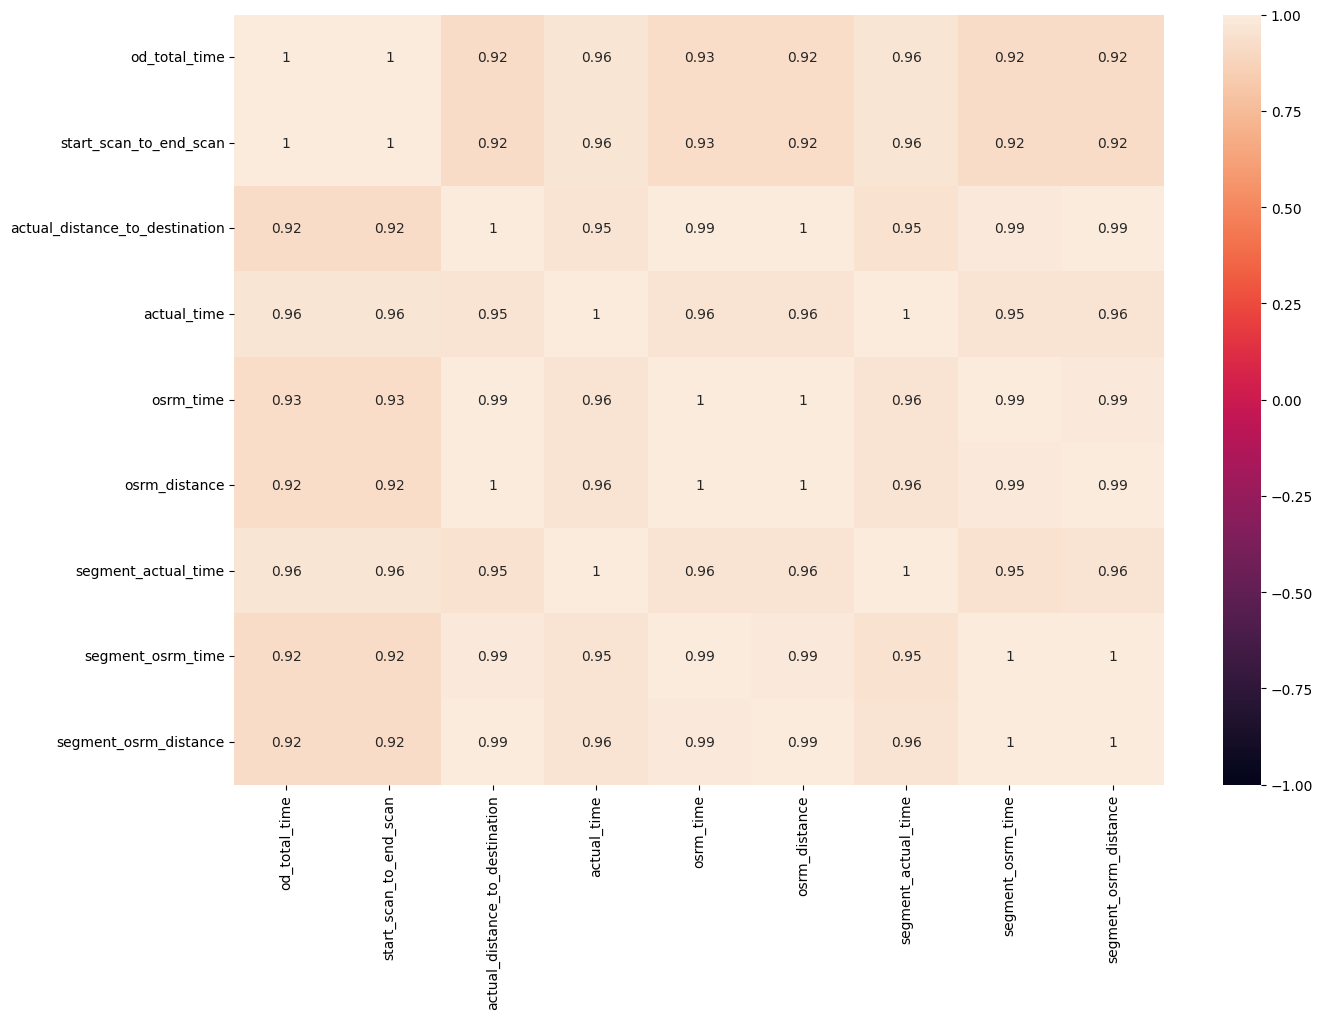

In [120]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

In [121]:
#Very High Correlation (> 0.9) exists between columns all the numerical columns specified above

# In-depth analysis and feature engineering:

## Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check
STEP-1 : Set up Null Hypothesis

> Null Hypothesis ( H0 ) - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.
> Alternate Hypothesis ( HA ) - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.

STEP-2 : Checking for basic assumpitons for the hypothesis

> Distribution check using QQ Plot
> Homogeneity of Variances using Lavene's test

STEP-3: Define Test statistics; Distribution of T under H0.

> If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

STEP-4: Compute the p-value and fix value of alpha.

> We set our alpha to be 0.05

STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

In [125]:
data_2[['od_total_time', 'start_scan_to_end_scan']].describe()

,od_total_time,start_scan_to_end_scan
count,14817.000000,14817.000000
mean,531.697630,530.810016
std,658.868223,658.705957
min,23.460000,23.000000
25%,149.930000,149.000000
50%,280.770000,280.000000
75%,638.200000,637.000000
max,7898.550000,7898.000000


[]

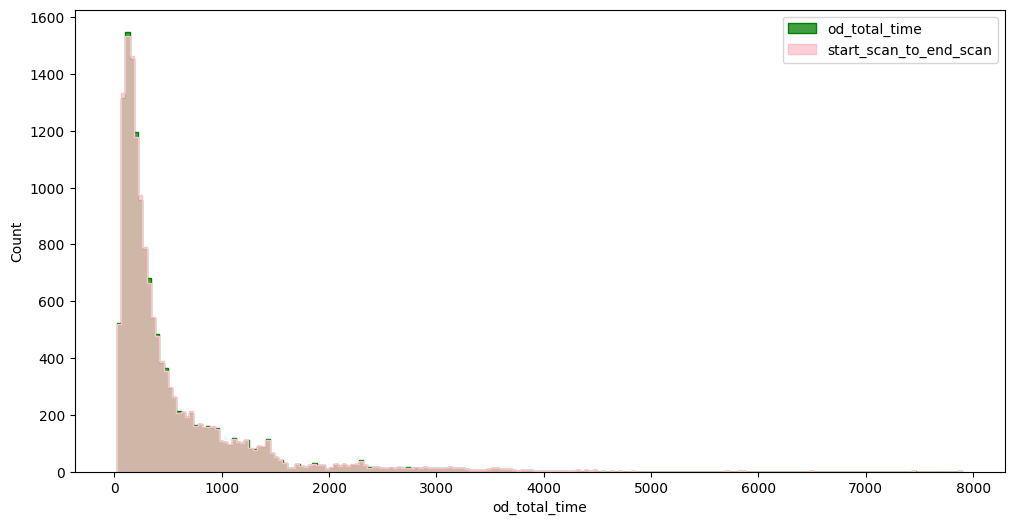

In [127]:
#Visual Tests to know if the samples follow normal distribution
plt.figure(figsize = (12, 6))
sns.histplot(data_2['od_total_time'], element = 'step', color = 'green')
sns.histplot(data_2['start_scan_to_end_scan'], element = 'step', color = 'pink')
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.plot()

In [129]:
import scipy.stats as spy

[]

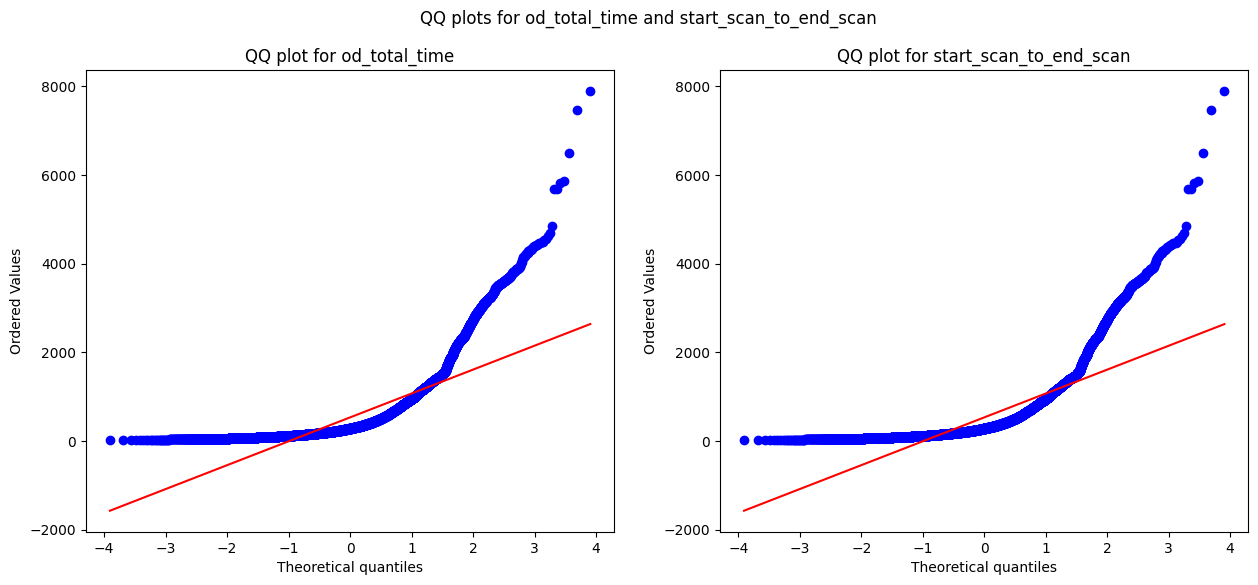

In [130]:
#Distribution check using QQ Plot
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(data_2['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
spy.probplot(data_2['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution

H1 : The sample does not follow normal distribution

alpha = 0.05

In [131]:
#Test Statistics : Shapiro-Wilk test for normality

test_stat, p_value = spy.shapiro(data_2['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


In [132]:
test_stat, p_value = spy.shapiro(data_2['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [133]:
#Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.
transformed_od_total_time = spy.boxcox(data_2['od_total_time'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.172770042757021e-25
The sample does not follow normal distribution


In [134]:
transformed_start_scan_to_end_scan = spy.boxcox(data_2['start_scan_to_end_scan'])[0]
test_stat, p_value = spy.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0471322892609475e-24
The sample does not follow normal distribution


In [135]:
#1. Even after applying the boxcox transformation on each of the "od_total_time" and "start_scan_to_end_scan" columns, the distributions do not follow normal distribution.
#2. Homogeneity of Variances using Lavene's test

In [136]:
# Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(data_2['od_total_time'], data_2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.9668007217581142
The samples have Homogenous Variance 


In [137]:
#Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.
test_stat, p_value = spy.mannwhitneyu(data_2['od_total_time'], data_2['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.7815123224221716


In [138]:
# Since p-value > alpha therfore it can be concluded that od_total_time and start_scan_to_end_scan are similar

# Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [139]:
data_2[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143768,161.384018
std,561.396118,271.360992
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


[]

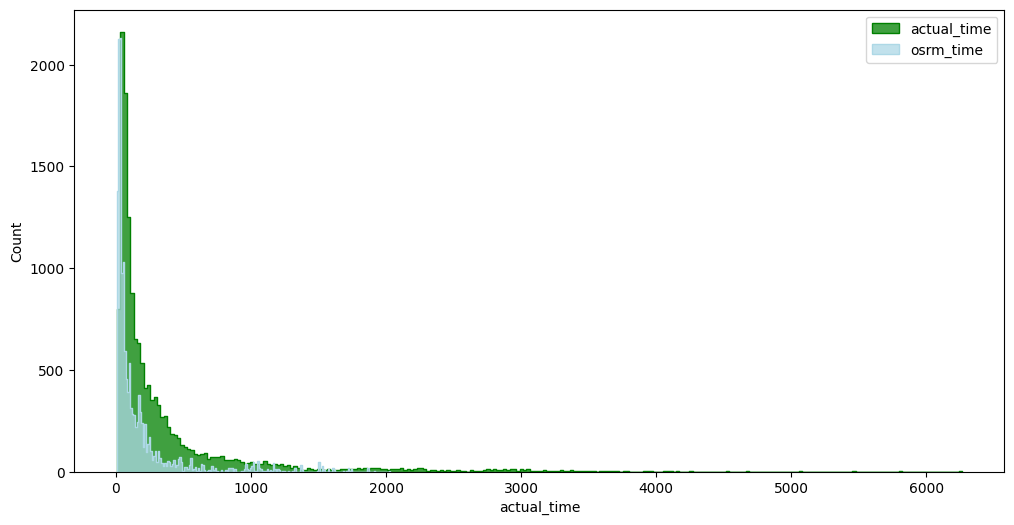

In [140]:
#Visual Tests to know if the samples follow normal distribution
plt.figure(figsize = (12, 6))
sns.histplot(data_2['actual_time'], element = 'step', color = 'green')
sns.histplot(data_2['osrm_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

[]

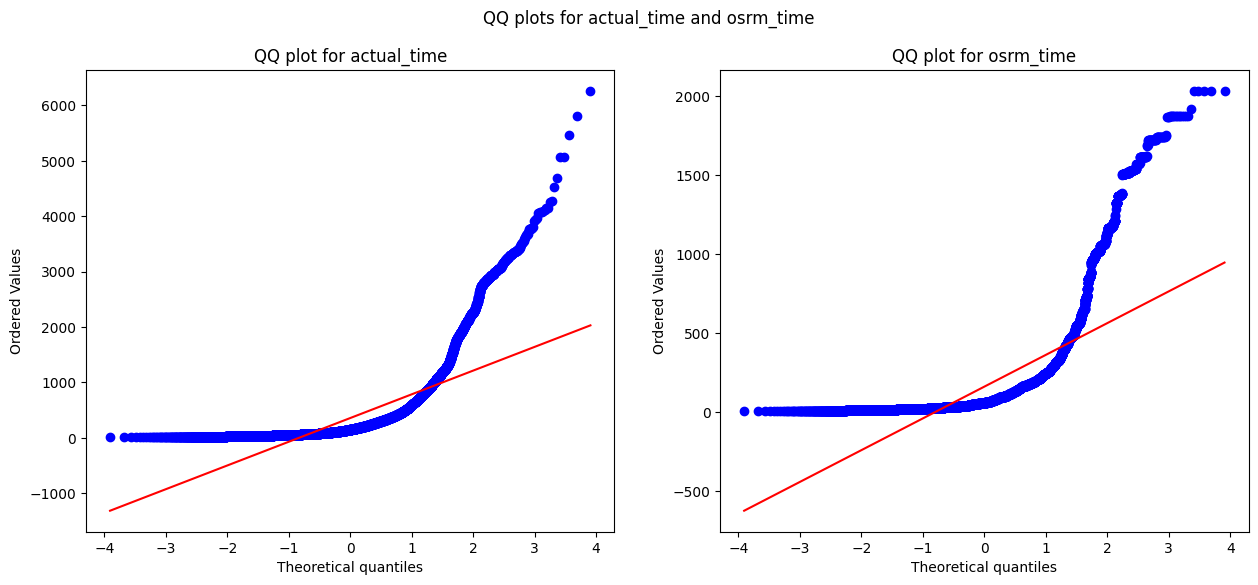

In [141]:
# Distribution check using QQ Plot
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(data_2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(data_2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

In [142]:
# It can be seen from the above plots that the samples do not come from normal distribution

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution

H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [143]:
test_stat, p_value = spy.shapiro(data_2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   

p-value 0.0
The sample does not follow normal distribution


In [144]:
test_stat, p_value = spy.shapiro(data_2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


In [145]:
#Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.
transformed_actual_time = spy.boxcox(data_2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.020620453603145e-28
The sample does not follow normal distribution


In [146]:
transformed_osrm_time = spy.boxcox(data_2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5882550510138333e-35
The sample does not follow normal distribution


In [147]:
#1. Even after applying the boxcox transformation on each of the "actual_time" and "osrm_time" columns, the distributions do not follow normal distribution.
#2. Homogeneity of Variances using Lavene's test

In [148]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(data_2['actual_time'], data_2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.871098057987424e-220
The samples do not have  Homogenous Variance


In [149]:
#Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.
test_stat, p_value = spy.mannwhitneyu(data_2['actual_time'], data_2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 0.0
The samples are not similar


In [150]:
#Since p-value < alpha therfore it can be concluded that actual_time and osrm_time are not similar.

# Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [152]:
data_2[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143768,353.892273
std,561.396118,556.247925
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


[]

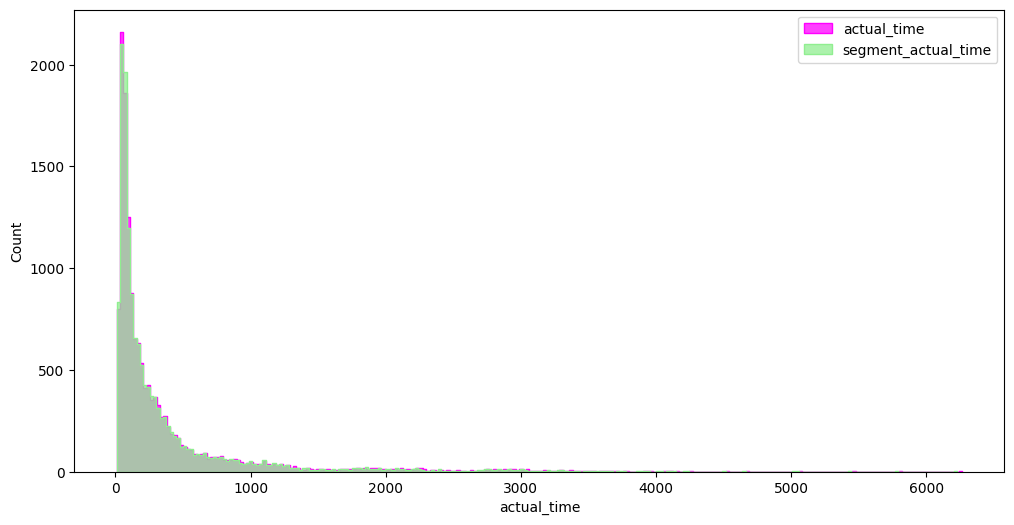

In [155]:
#Visual Tests to know if the samples follow normal distribution
plt.figure(figsize = (12, 6))
sns.histplot(data_2['actual_time'], element = 'step', color = 'magenta')
sns.histplot(data_2['segment_actual_time'], element = 'step', color = 'lightgreen')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

[]

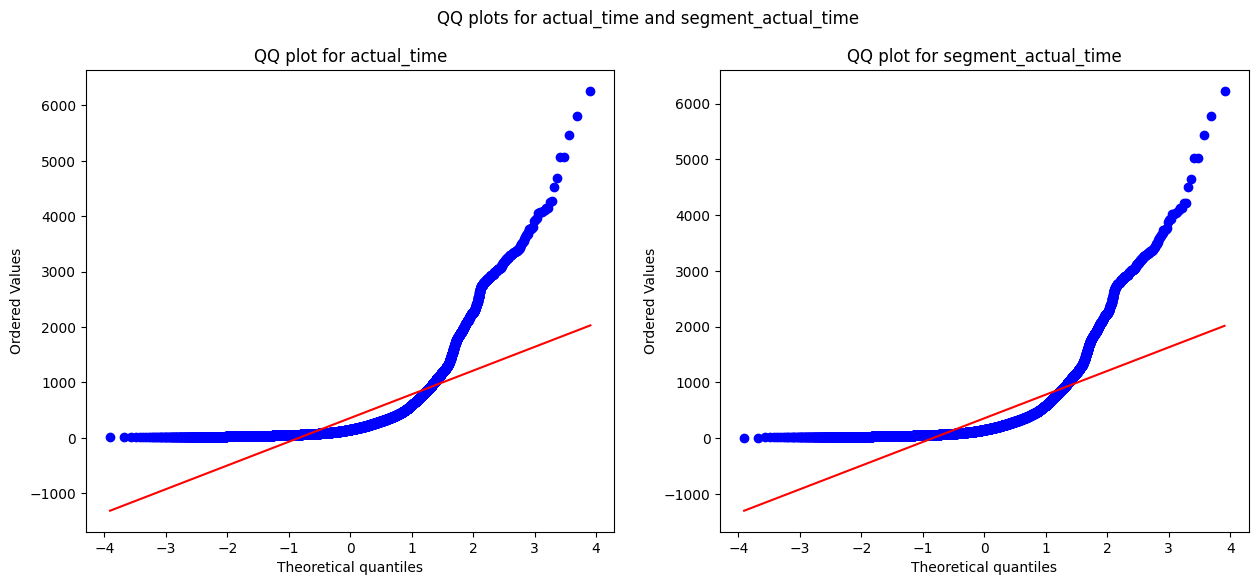

In [159]:
#Distribution check using QQ Plot
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(data_2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(data_2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution 

H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [160]:
test_stat, p_value = spy.shapiro(data_2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [161]:
test_stat, p_value = spy.shapiro(data_2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


In [162]:
#Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [163]:
transformed_actual_time = spy.boxcox(data_2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.020620453603145e-28
The sample does not follow normal distribution


In [164]:
transformed_segment_actual_time = spy.boxcox(data_2['segment_actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.700074948787037e-29
The sample does not follow normal distribution


In [165]:
#Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, 
#the distributions do not follow normal distribution.

#Homogeneity of Variances using Lavene's test

In [167]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(data_2['actual_time'], data_2['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.695502241317651
The samples have Homogenous Variance 


In [170]:
#Since the samples do not come from normal distribution T-Test cannot be applied here,
#we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.
test_stat, p_value = spy.mannwhitneyu(data_2['actual_time'], data_2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 0.4164235159622476
The samples are similar 


In [171]:
#Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.

# Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [173]:
data_2[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344711,223.201157
std,370.395569,416.628387
min,9.072900,9.072900
25%,30.819201,32.654499
50%,65.618805,70.154404
75%,208.475006,218.802399
max,2840.081055,3523.632324


In [174]:
#Visual Tests to know if the samples follow normal distribution

[]

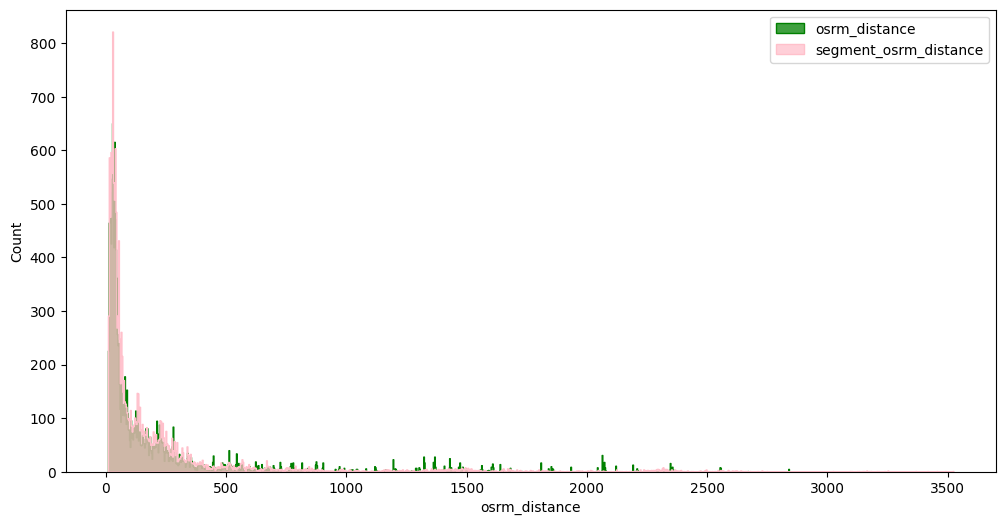

In [175]:
plt.figure(figsize = (12, 6))
sns.histplot(data_2['osrm_distance'], element = 'step', color = 'green', bins = 1000)
sns.histplot(data_2['segment_osrm_distance'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

In [176]:
#Distribution check using QQ Plot

[]

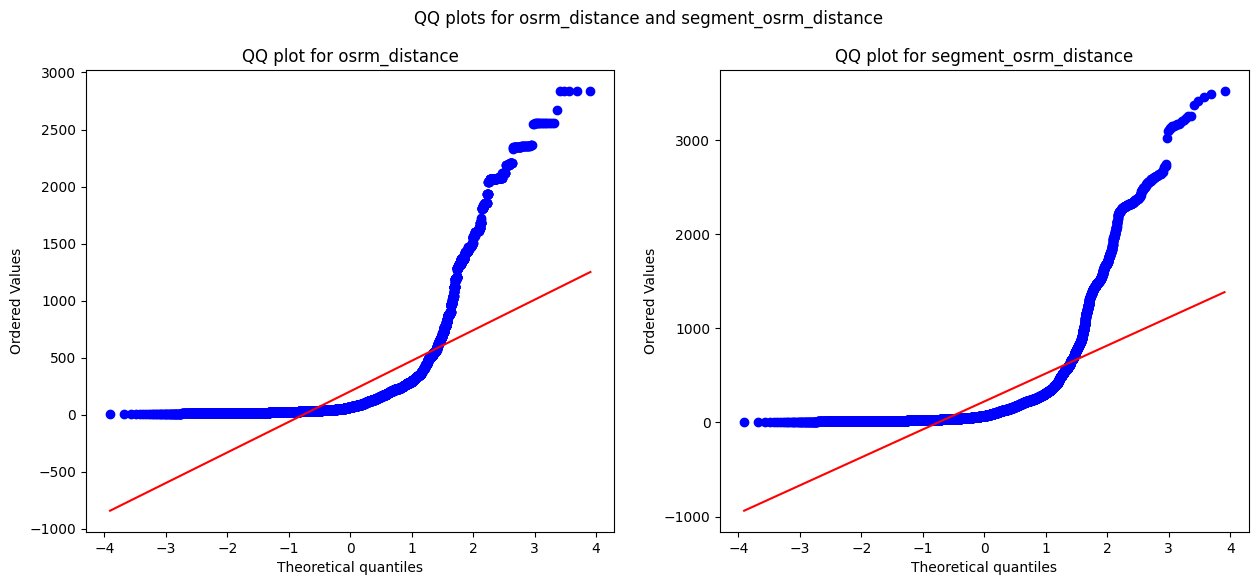

In [177]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(data_2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(data_2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution 

H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [178]:
test_stat, p_value = spy.shapiro(data_2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [179]:
test_stat, p_value = spy.shapiro(data_2['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [180]:
#Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [181]:
transformed_osrm_distance = spy.boxcox(data_2['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 7.063104779582808e-41
The sample does not follow normal distribution


In [182]:
transformed_segment_osrm_distance = spy.boxcox(data_2['segment_osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.049169406432229e-38
The sample does not follow normal distribution


In [183]:
#Even after applying the boxcox transformation on each of the "osrm_distance" and "segment_osrm_distance" columns, 
#the distributions do not follow normal distribution.

#Homogeneity of Variances using Lavene's test

In [184]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(data_2['osrm_distance'], data_2['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.00020976006524780905
The samples do not have Homogenous Variance


In [185]:
#Since the samples do not follow any of the assumptions, T-Test cannot be applied here. 
#We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [186]:
test_stat, p_value = spy.mannwhitneyu(data_2['osrm_distance'], data_2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 9.509410818847664e-07
The samples are not similar


In [187]:
#Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are not similar.

# Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [188]:
data_2[['osrm_time', 'segment_osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,14817.0,161.384018,271.360992,6.0,29.0,60.0,168.0,2032.0
segment_osrm_time,14817.0,180.949783,314.542053,6.0,31.0,65.0,185.0,2564.0


In [189]:
#Visual Tests to know if the samples follow normal distribution

[]

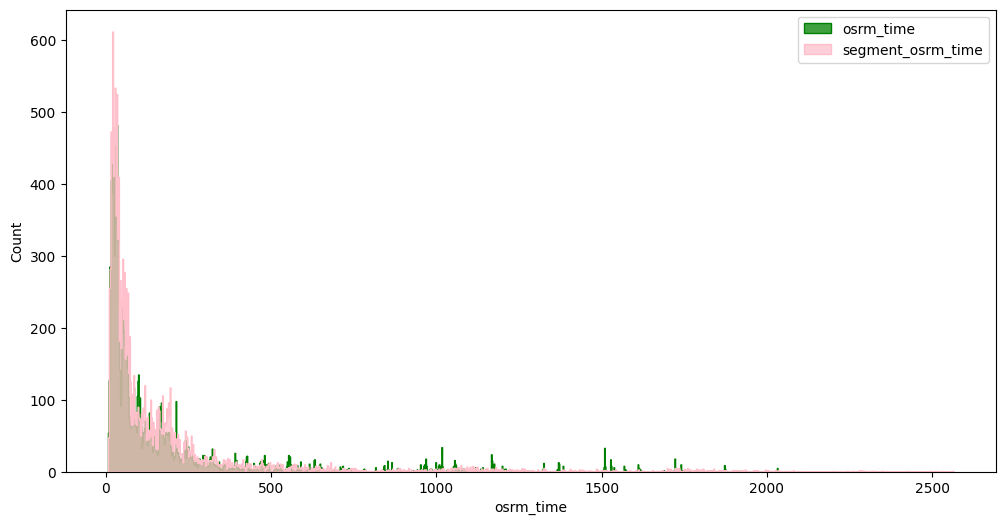

In [190]:
plt.figure(figsize = (12, 6))
sns.histplot(data_2['osrm_time'], element = 'step', color = 'green', bins = 1000)
sns.histplot(data_2['segment_osrm_time'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

In [191]:
#Distribution check using QQ Plot

[]

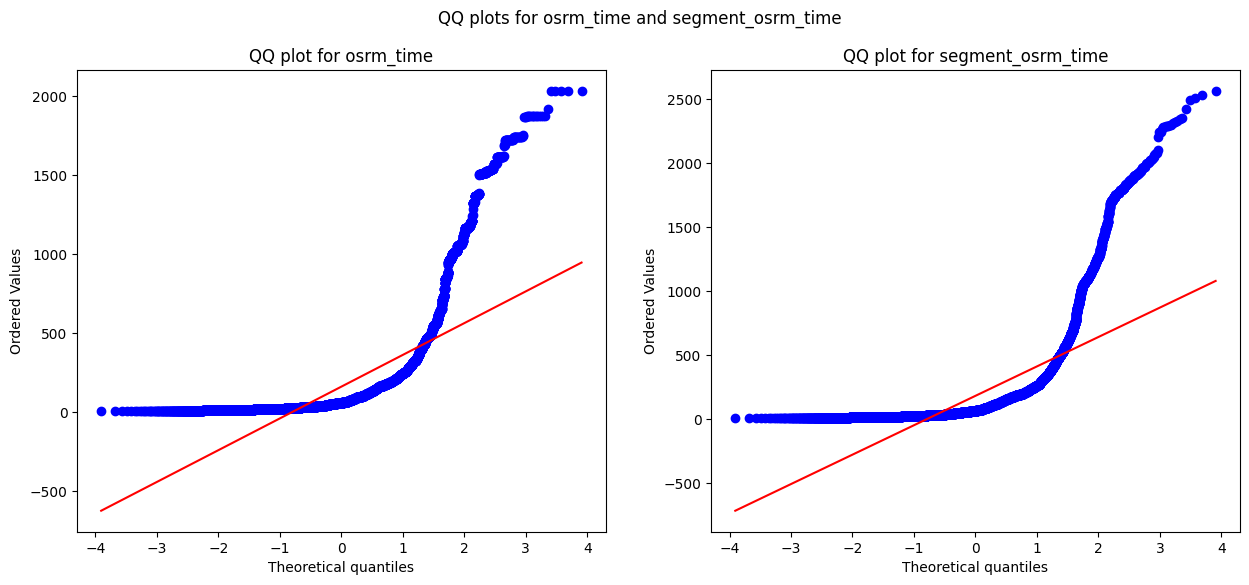

In [192]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(data_2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(data_2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality

H0 : The sample follows normal distribution 

H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [193]:
test_stat, p_value = spy.shapiro(data_2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [194]:
test_stat, p_value = spy.shapiro(data_2['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [195]:
#Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [196]:
transformed_osrm_time = spy.boxcox(data_2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5882550510138333e-35
The sample does not follow normal distribution


In [197]:
transformed_segment_osrm_time = spy.boxcox(data_2['segment_osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.943039152219146e-34
The sample does not follow normal distribution


In [198]:
#Even after applying the boxcox transformation on each of the "osrm_time" and "segment_osrm_time" columns, 
#the distributions do not follow normal distribution.

#Homogeneity of Variances using Lavene's test

In [199]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(data_2['osrm_time'], data_2['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 8.349506135727595e-08
The samples do not have Homogenous Variance


In [201]:
#Since the samples do not follow any of the assumptions, T-Test cannot be applied here. 
#We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [202]:
test_stat, p_value = spy.mannwhitneyu(data_2['osrm_time'], data_2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 2.2995370859748865e-08
The samples are not similar


In [203]:
#Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

# Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [204]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
data_2[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477829,305.388153,9.002461,22.837238,48.474072,164.583206,2186.531738
actual_time,14817.0,357.143768,561.396118,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360992,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344711,370.395569,9.072900,30.819201,65.618805,208.475006,2840.081055
segment_actual_time,14817.0,353.892273,556.247925,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949783,314.542053,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201157,416.628387,9.072900,32.654499,70.154404,218.802399,3523.632324


In [206]:
import matplotlib as mpl

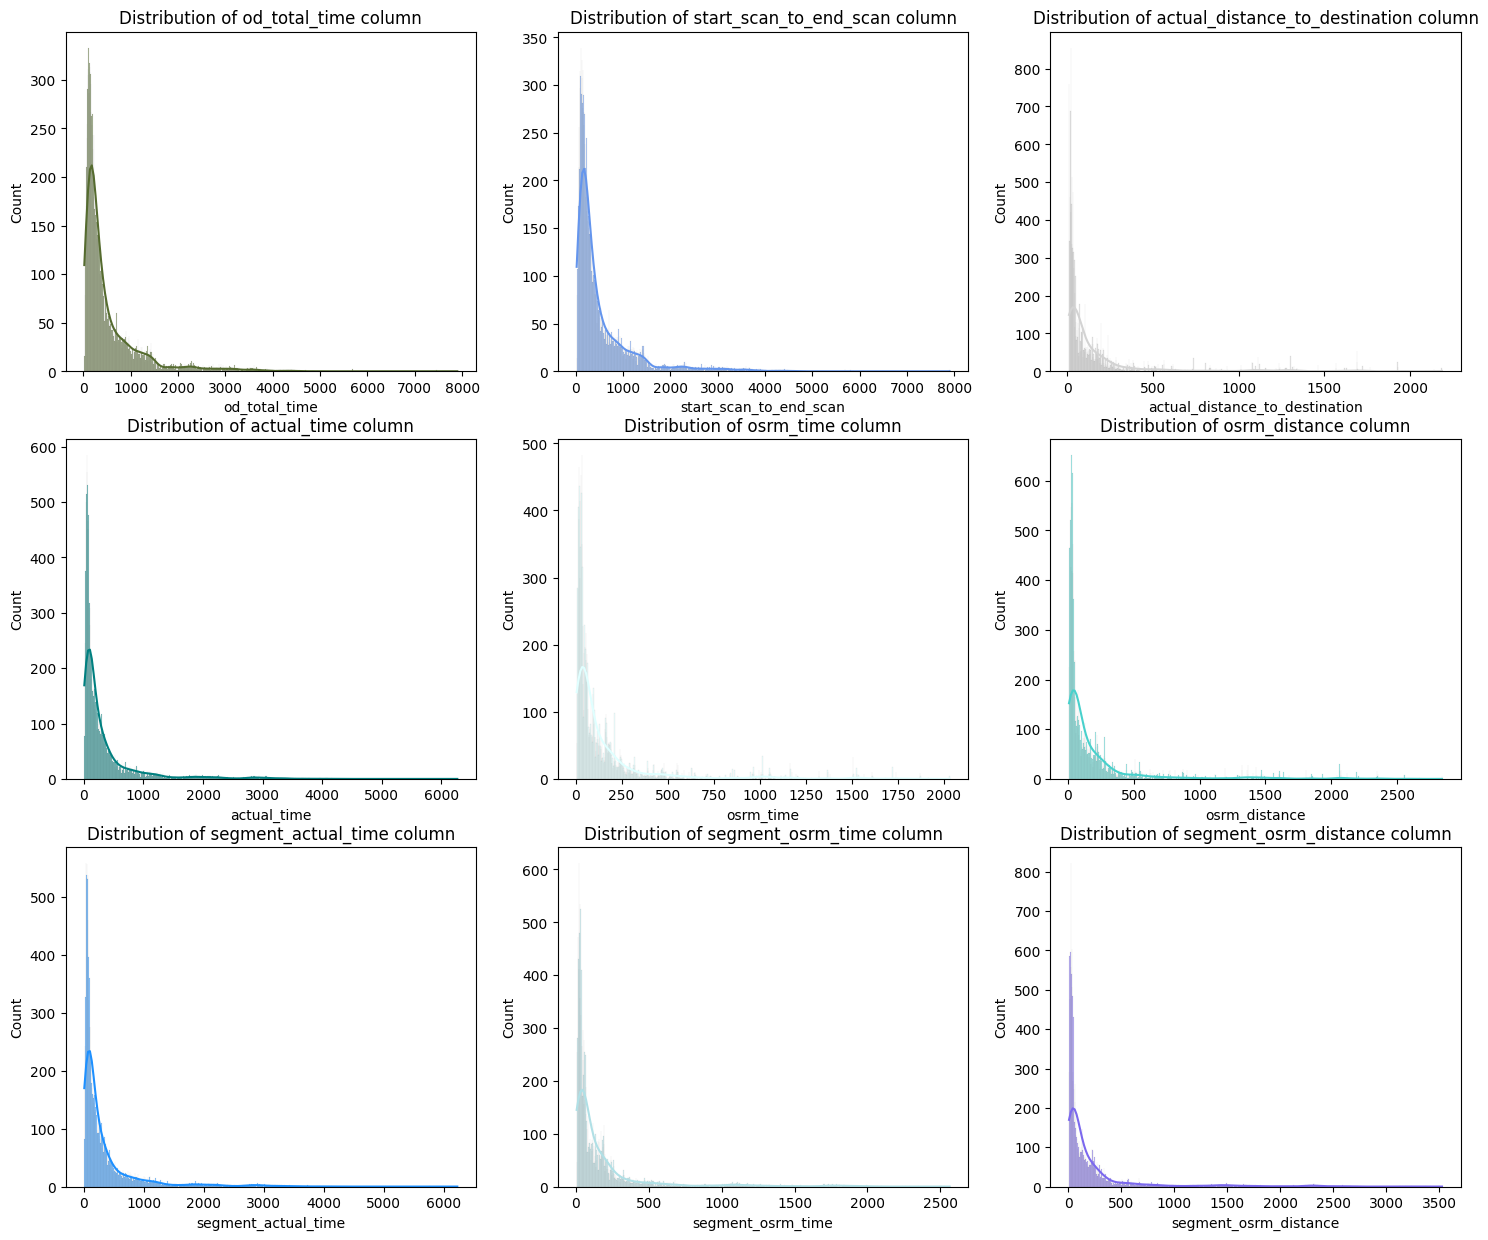

In [207]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.histplot(data_2[numerical_columns[i]], bins = 1000, kde = True, color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

In [209]:
#It can be inferred from the above plots that data in all the numerical columns are right skewed

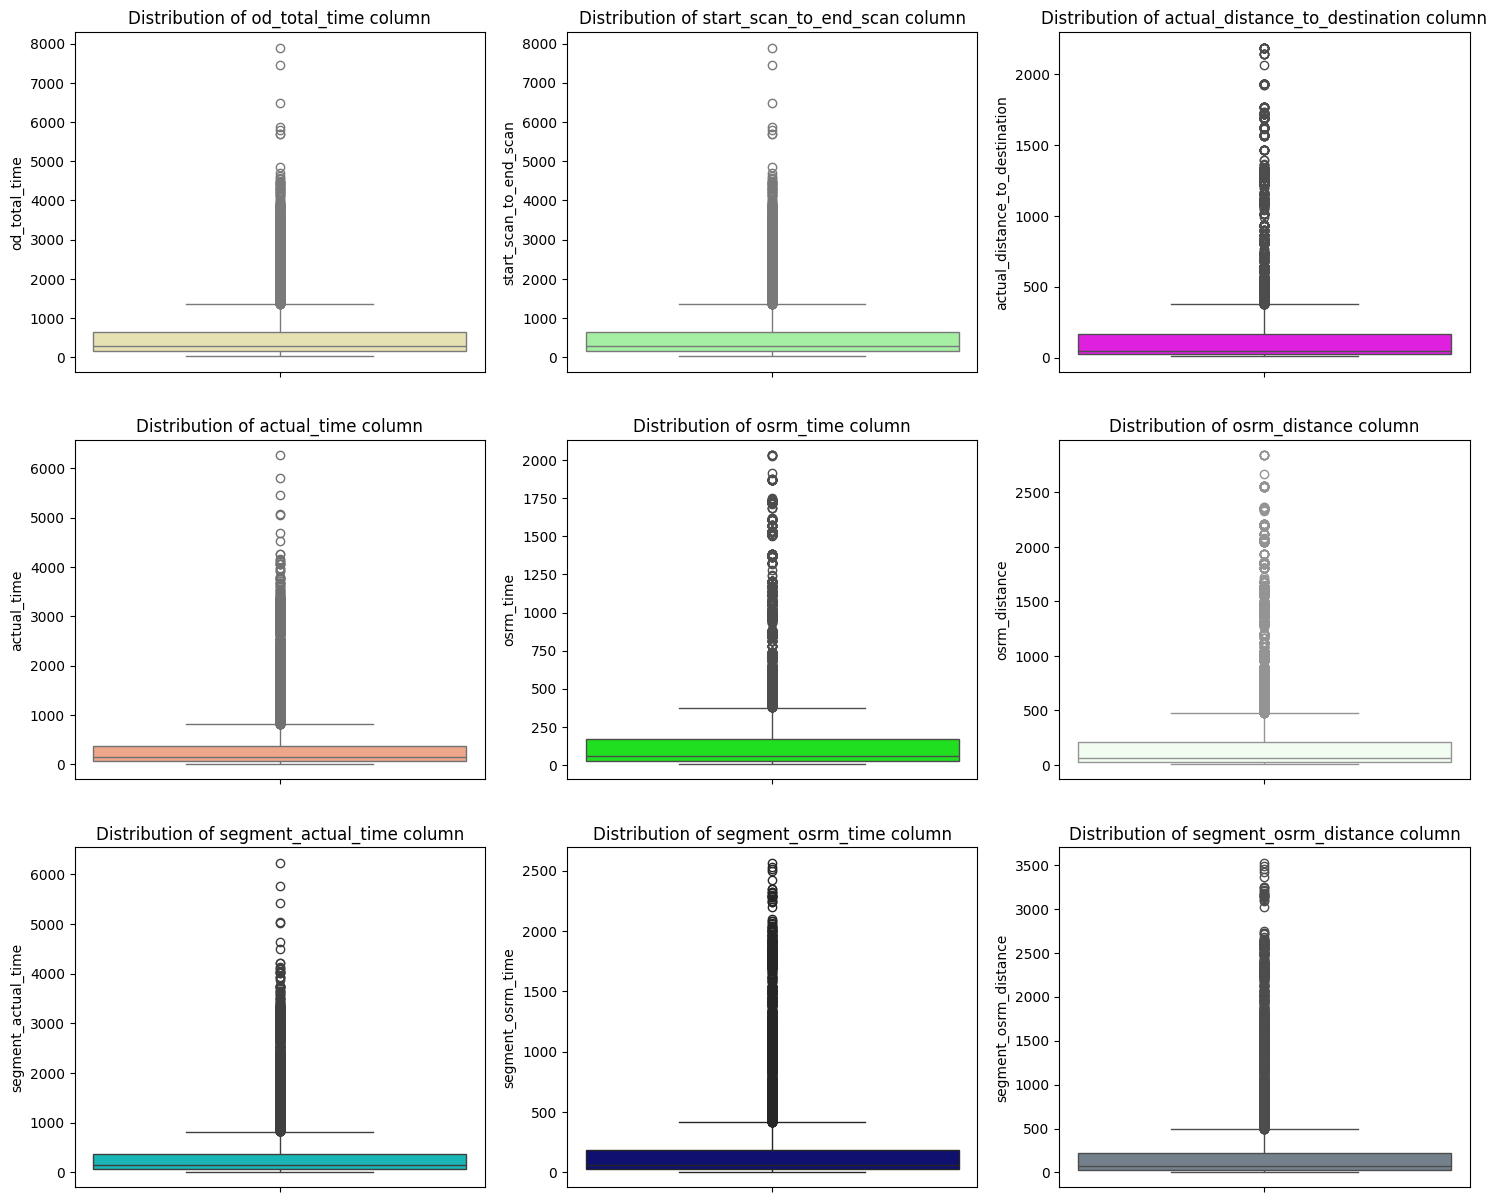

In [210]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(data_2[numerical_columns[i]], color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

In [211]:
#It can be clearly seen in the above plots that there are outliers in all the numerical columns that need to be treated.

In [214]:
# Detecting Outliers

for i in numerical_columns:
    Q1 = np.quantile(data_2[i], 0.25)
    Q3 = np.quantile(data_2[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = data_2.loc[(data_2[i] < LB) | (data_2[i] > UB)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Column : od_total_time
Q1 : 149.93
Q3 : 638.2
IQR : 488.27000000000004
LB : -582.4750000000001
UB : 1370.605
Number of outliers : 1266
----------------------------------
Column : start_scan_to_end_scan
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
LB : -583.0
UB : 1369.0
Number of outliers : 1267
----------------------------------
Column : actual_distance_to_destination
Q1 : 22.837238311767578
Q3 : 164.5832061767578
IQR : 141.74596786499023
LB : -189.78171348571777
UB : 377.20215797424316
Number of outliers : 1449
----------------------------------
Column : actual_time
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
LB : -387.5
UB : 824.5
Number of outliers : 1643
----------------------------------
Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 1517
----------------------------------
Column : osrm_distance
Q1 : 30.81920051574707
Q3 : 208.47500610351562
IQR : 177.65580558776855
LB : -235.66450786590576
UB : 474.95871448516846
Number of outliers : 1524
-------------

In [215]:
#The outliers present in our sample data can be the true outliers. It's best to remove outliers only when there is a sound reason for doing so. 
#Some outliers represent natural variations in the population, and they should be left as is in the dataset.

# Do one-hot encoding of categorical variables (like route_type)

In [216]:
# Get value counts before one-hot encoding

data_2['route_type'].value_counts()

route_type
Carting    8908
FTL        5909
Name: count, dtype: int64

In [217]:
# Perform one-hot encoding on categorical column route type

In [218]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
data_2['route_type'] = label_encoder.fit_transform(data_2['route_type'])

In [219]:
# Get value counts after one-hot encoding

data_2['route_type'].value_counts()

route_type
0    8908
1    5909
Name: count, dtype: int64

In [220]:
# Get value counts of categorical variable 'data' before one-hot encoding

data_2['data'].value_counts()

data
training    10654
test         4163
Name: count, dtype: int64

In [221]:
# Perform one-hot encoding on categorical variable 'data'

In [222]:
label_encoder = LabelEncoder()
data_2['data'] = label_encoder.fit_transform(data_2['data'])

In [223]:
# Get value counts after one-hot encoding

data_2['data'].value_counts()

data
1    10654
0     4163
Name: count, dtype: int64

# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [224]:
from sklearn.preprocessing import MinMaxScaler

[]

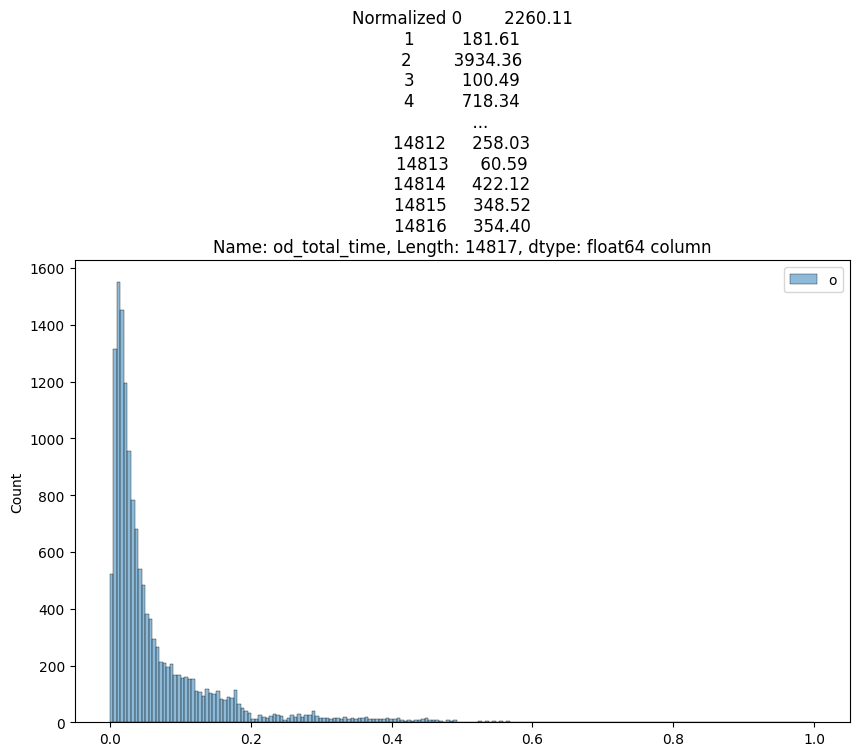

In [225]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

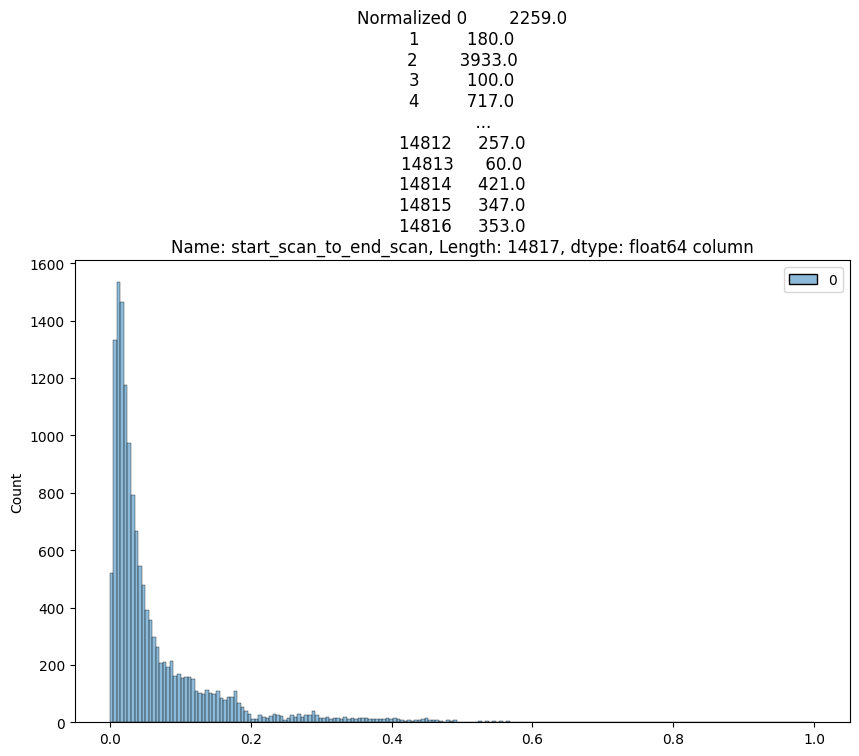

In [226]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['start_scan_to_end_scan']} column")
plt.plot()

[]

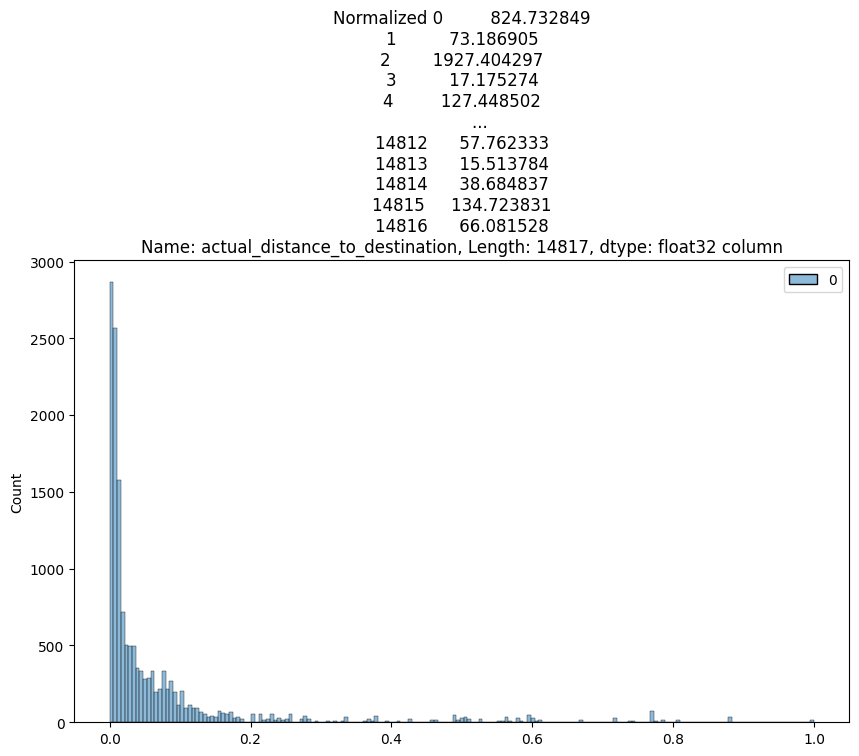

In [227]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['actual_distance_to_destination']} column")
plt.plot()

[]

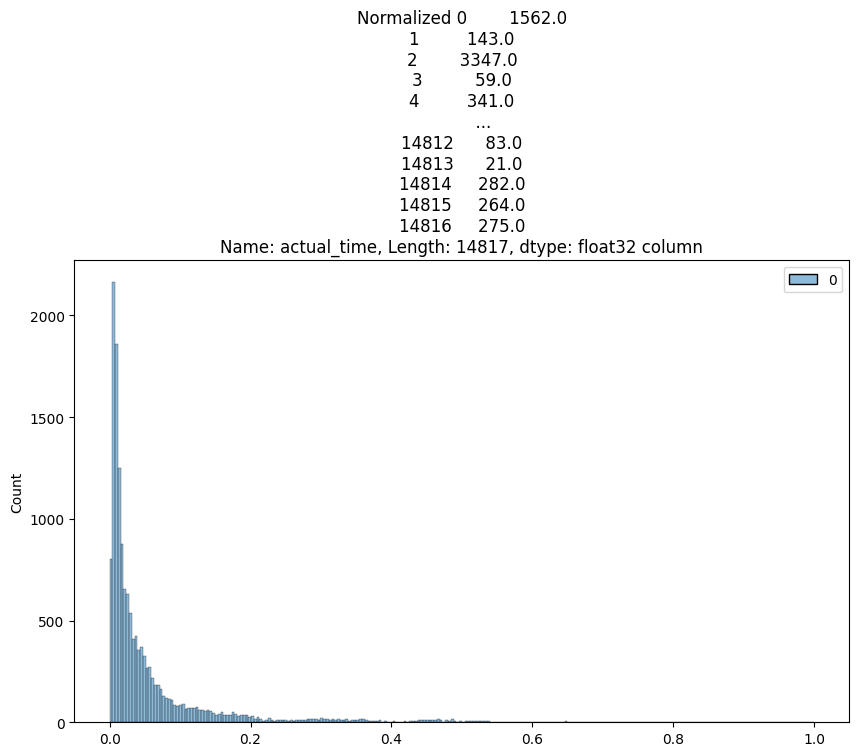

In [228]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['actual_time']} column")
plt.plot()

[]

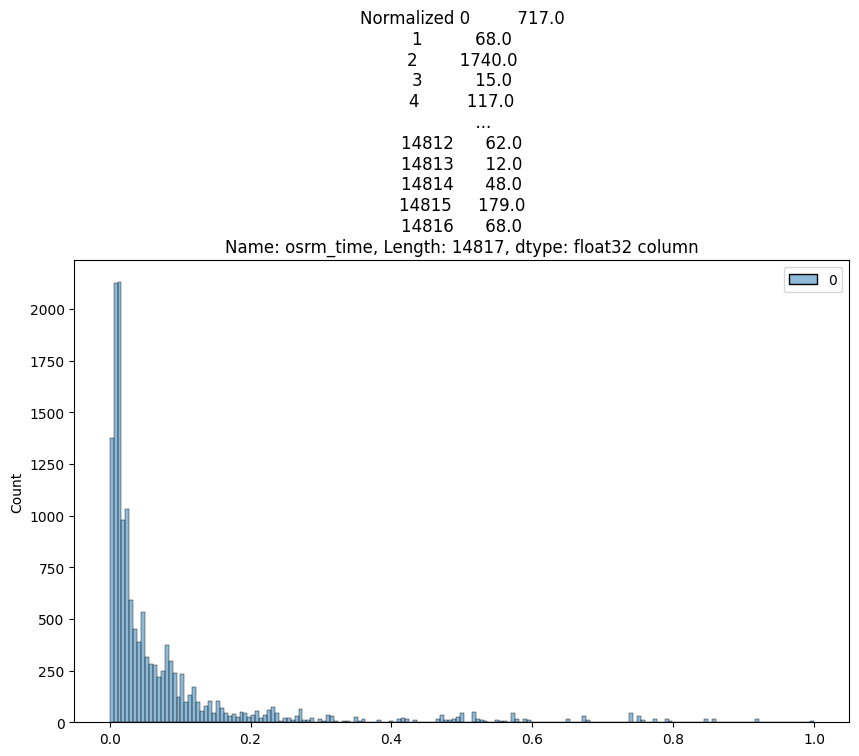

In [229]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['osrm_time']} column")
plt.plot()

[]

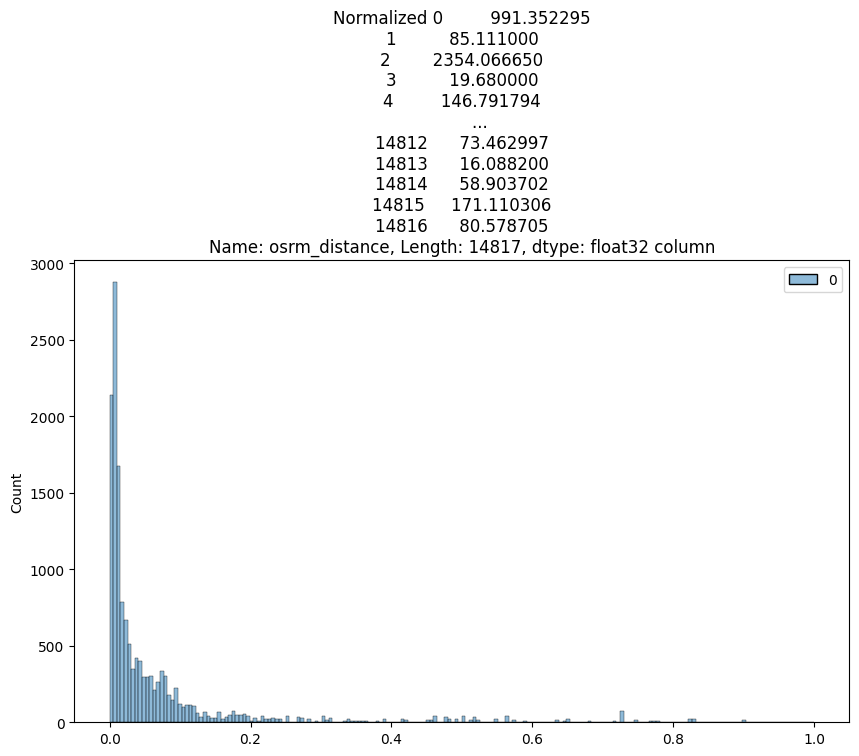

In [230]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['osrm_distance']} column")
plt.plot()

[]

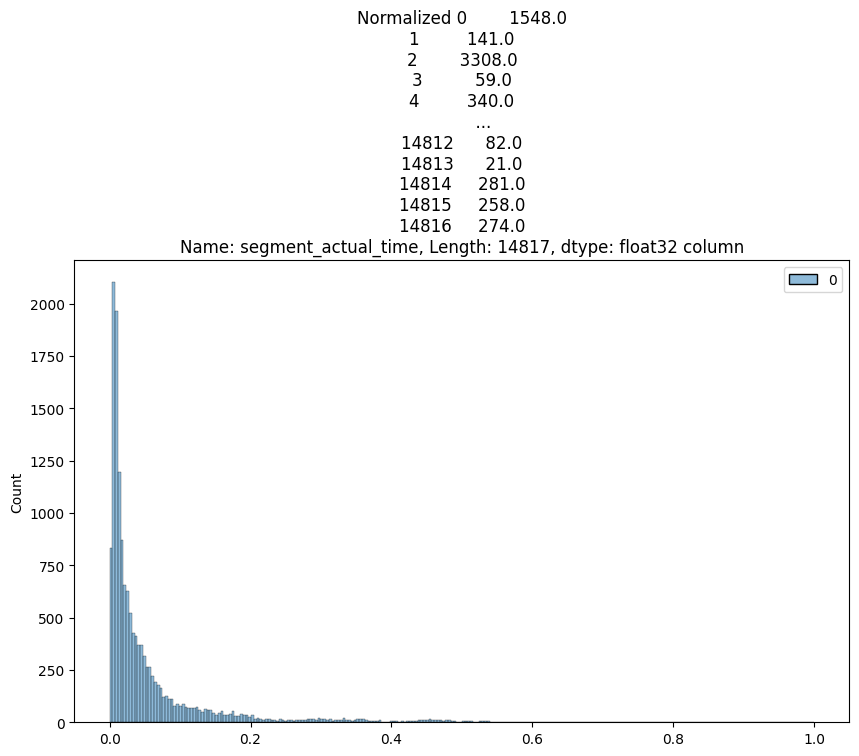

In [231]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['segment_actual_time']} column")
plt.plot()

[]

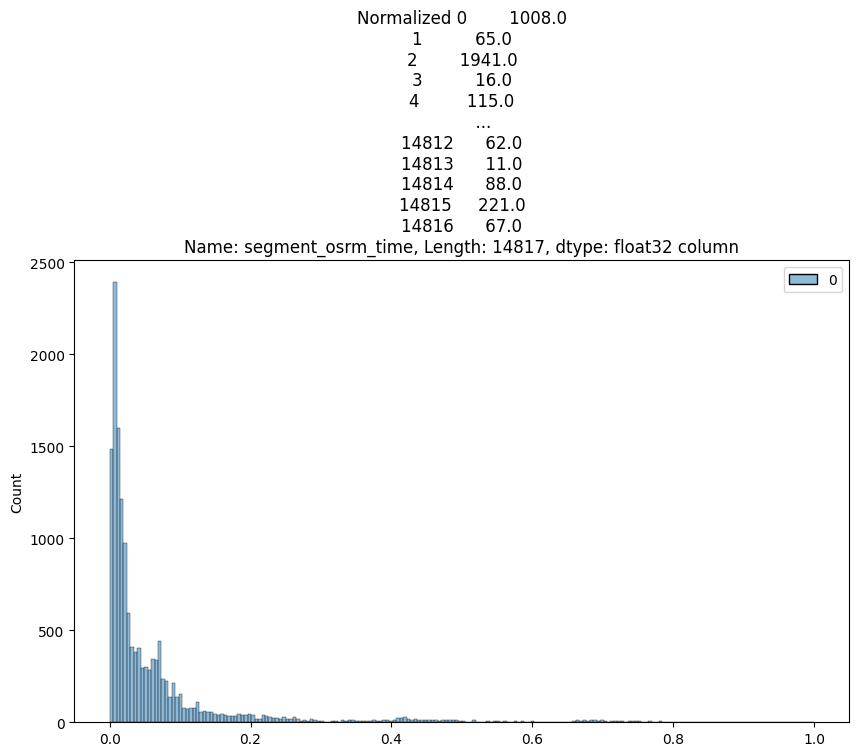

In [232]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['segment_osrm_time']} column")
plt.plot()

[]

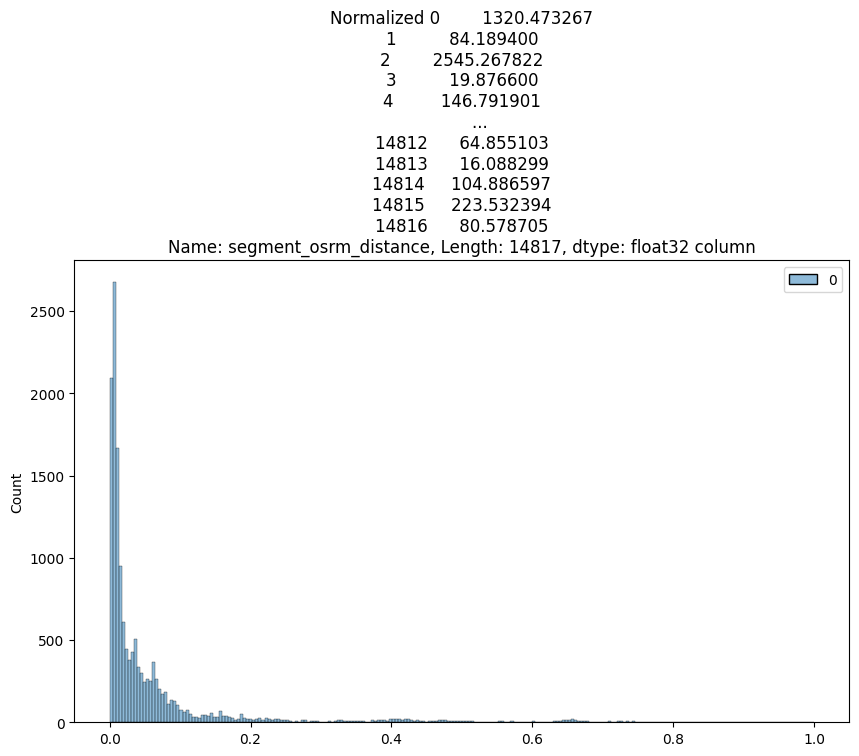

In [233]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {data_2['segment_osrm_distance']} column")
plt.plot()

# Column Standardization

In [234]:
from sklearn.preprocessing import StandardScaler

[]

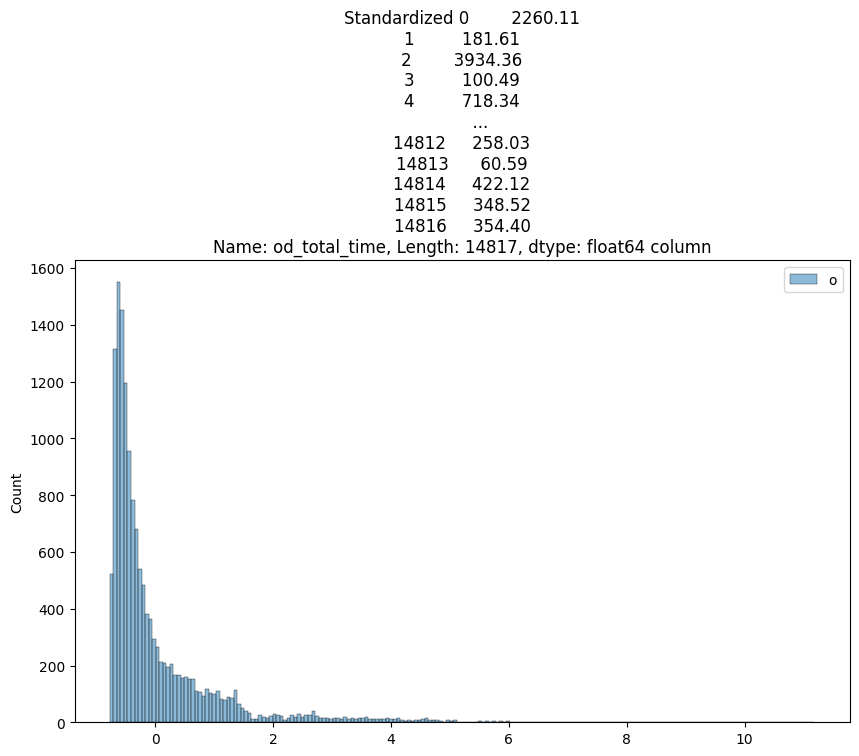

In [235]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data_2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

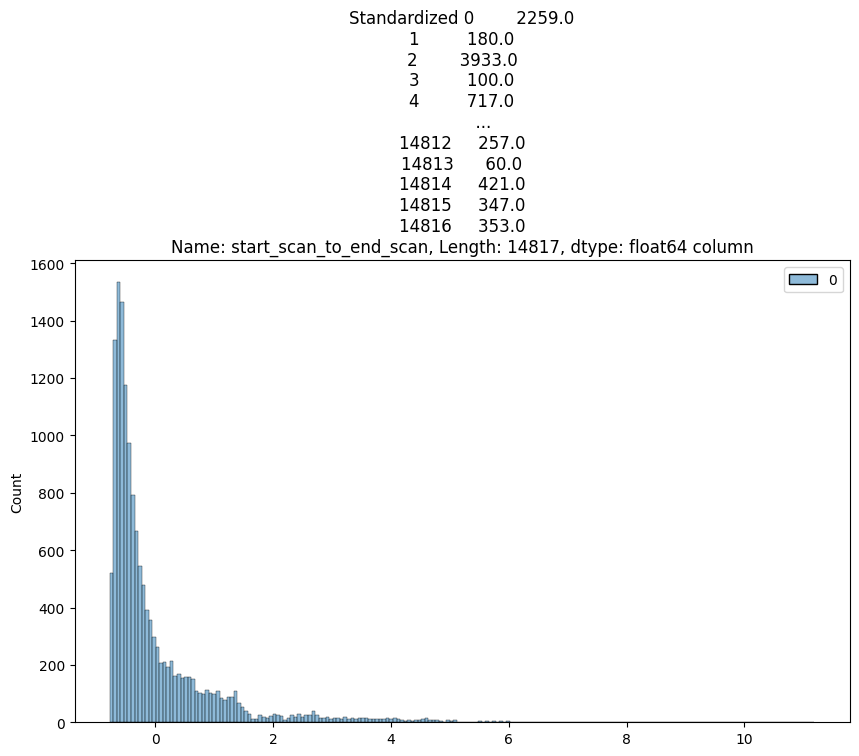

In [236]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data_2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['start_scan_to_end_scan']} column")
plt.plot()

[]

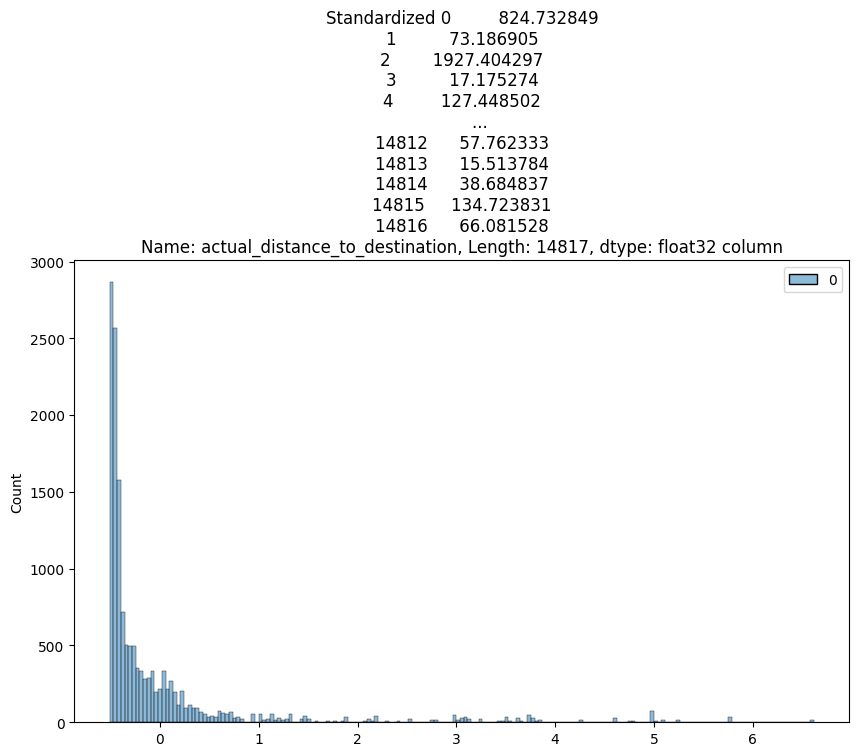

In [237]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data_2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['actual_distance_to_destination']} column")
plt.plot()

[]

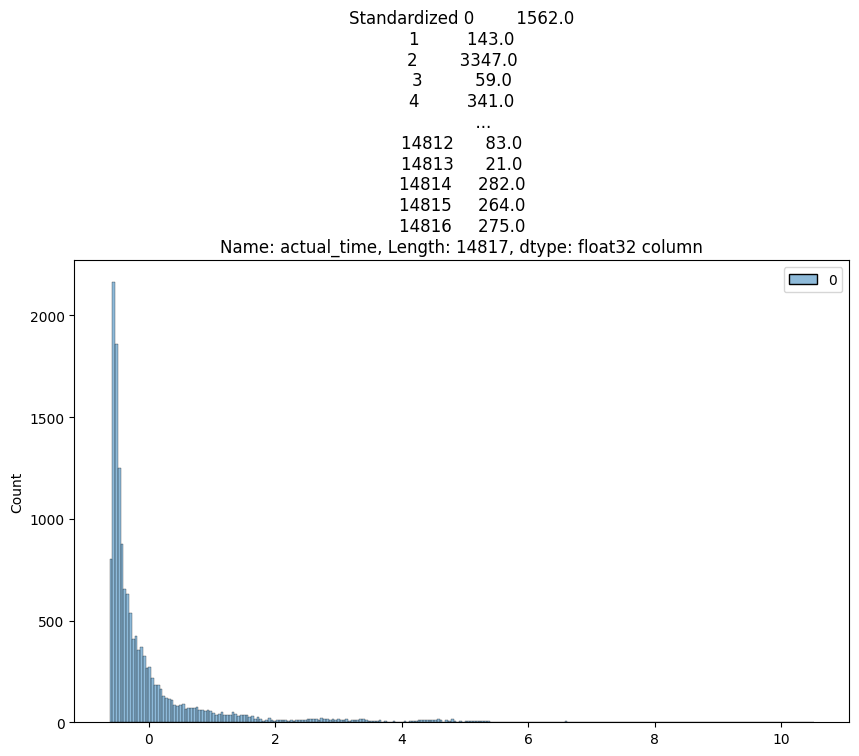

In [238]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data_2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['actual_time']} column")
plt.plot()

[]

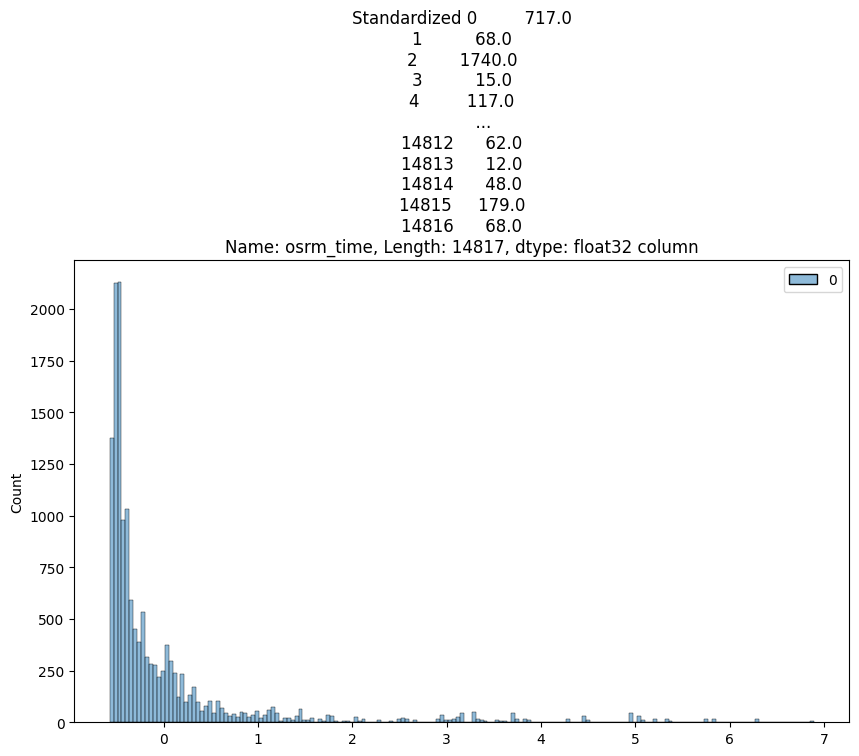

In [239]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data_2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['osrm_time']} column")
plt.plot()

[]

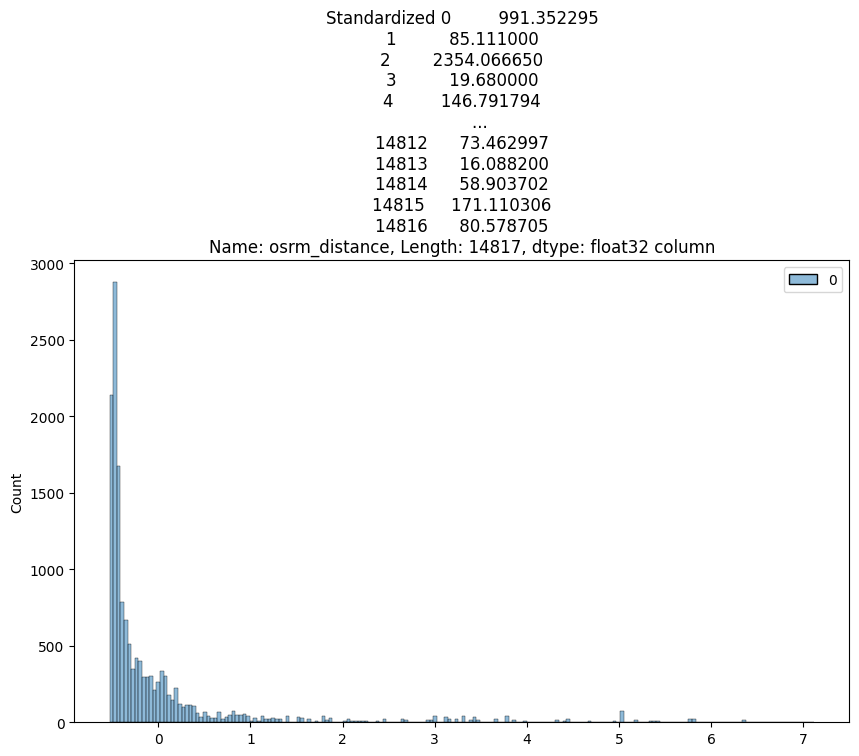

In [240]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data_2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['osrm_distance']} column")
plt.plot()

[]

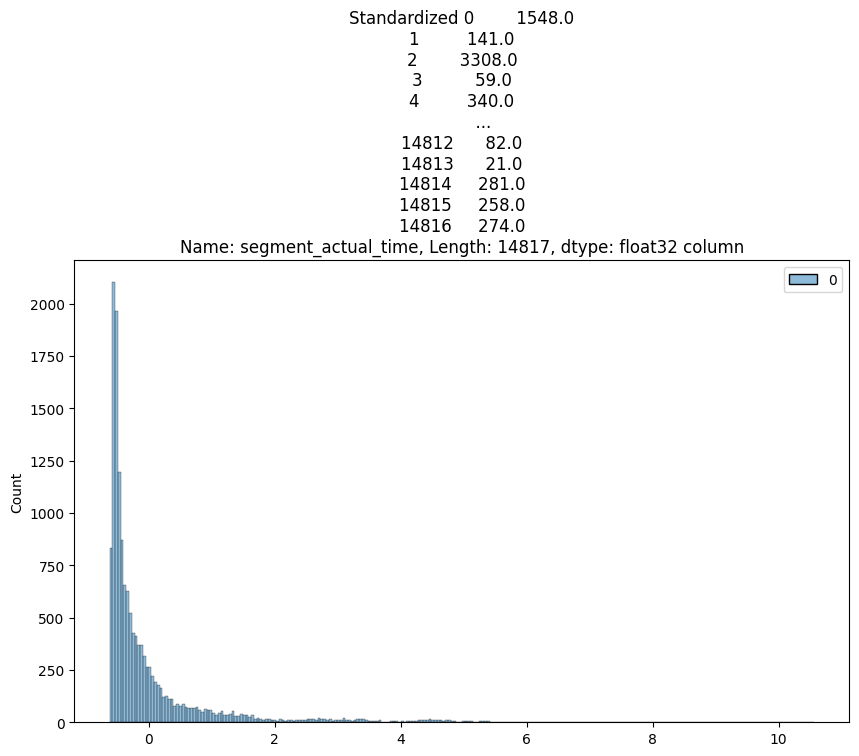

In [241]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data_2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['segment_actual_time']} column")
plt.plot()

[]

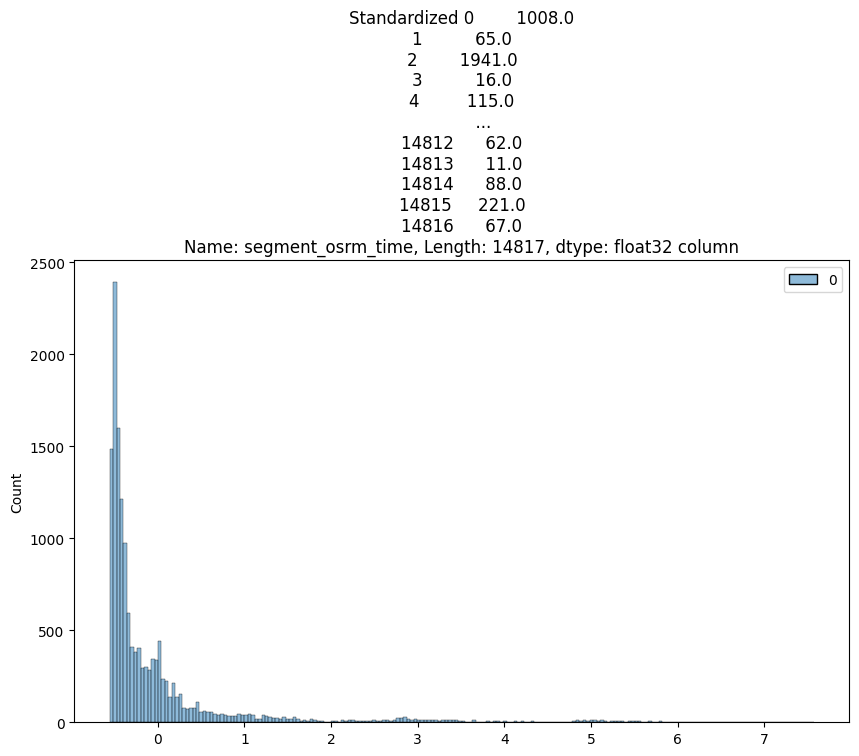

In [242]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data_2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['segment_osrm_time']} column")
plt.plot()

[]

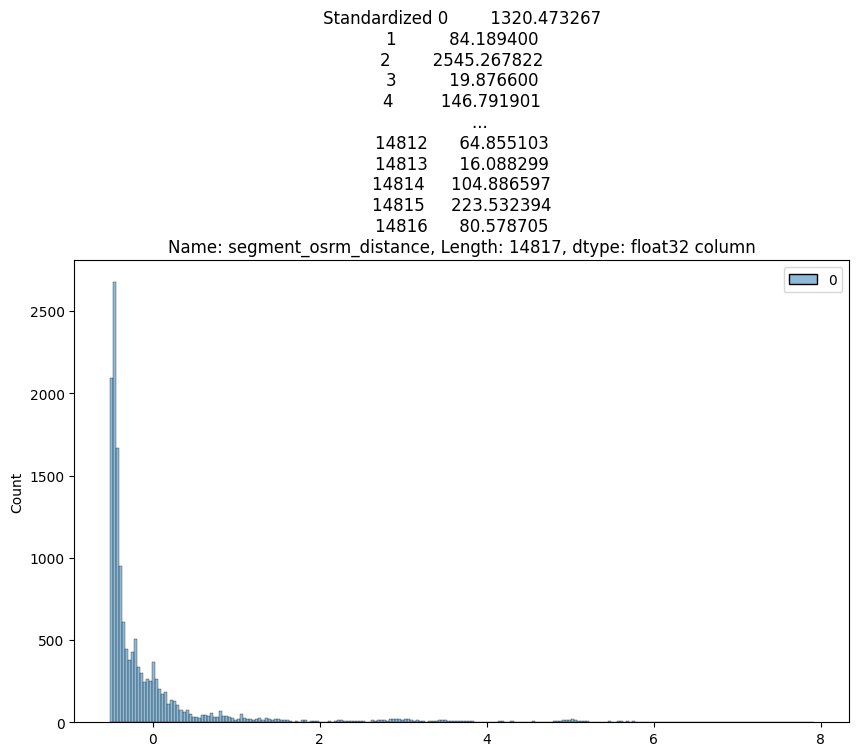

In [243]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(data_2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {data_2['segment_osrm_distance']} column")
plt.plot()

## Business Insights
The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.

Most of the data is for testing than for training.

Most common route type is Carting.

The names of 14 unique location ids are missing in the data.

The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

Maximum trips are created in the 38th week.

Most orders come mid-month. That means customers usually make more orders in the mid of the month.

Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.

Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.

Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.

Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.

Features start_scan_to_end_scan and od_total_time(created feature) are statistically similar.

Features actual_time & osrm_time are statitically different.

Features start_scan_to_end_scan and segment_actual_time are statistically similar.

Features osrm_distance and segment_osrm_distance are statistically different from each other.

Both the osrm_time & segment_osrm_time are not statistically same.

## Recommendations
The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.

osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.

Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.

From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.

 